# Rainfall Weather Forecasting

## Project Description

Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.
Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia.


## Dataset Description

Date  - The date of observation

Location  -The common name of the location of the weather station

MinTemp  -The minimum temperature in degrees celsius

MaxTemp -The maximum temperature in degrees celsius

Rainfall  -The amount of rainfall recorded for the day in mm

Evaporation  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am

Sunshine  -The number of hours of bright sunshine in the day.

WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight

WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight

WindDir9am -Direction of the wind at 9am

WindDir3pm -Direction of the wind at 3pm

WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am

WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm

Humidity9am -Humidity (percent) at 9am

Humidity3pm -Humidity (percent) at 3pm

Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am

Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm

Cloud9am - Fraction of sky obscured by cloud at 9am. 

Cloud3pm -Fraction of sky obscured by cloud 

Temp9am-Temperature (degrees C) at 9am

Temp3pm -Temperature (degrees C) at 3pm

RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0

RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".

##  Problem Statement: 
a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.

b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.


In [1]:
# importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Loading the dataset
df_rain=pd.read_csv("Rainfall forecasting.csv")
pd.options.display.max_columns=None
df_rain.head(15)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,W,19.0,24.0,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,W,20.0,24.0,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,W,6.0,17.0,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,NW,7.0,28.0,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,SSE,15.0,11.0,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


## Starting the EDA

In [3]:
# Checking Configuration of Dataset
df_rain.shape

(8425, 23)

Obs- As the dataset contains rainfall information of 10 years and of various lcaotion, we have large enries of 8425 rows and 23 columns

In [4]:
# Checking data types of attributes
df_rain.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

Obs- The dataset contains both numeric as well as categorical values

In [5]:
#Seperating Numerical and Categorical Column
cat_cols = [x for x in df_rain.columns if df_rain[x].dtypes=='O']

num_cols = [y for y in df_rain.columns if df_rain[y].dtypes!='O']

In [6]:
# Checking for null values if any
df_rain.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

Obs- We can see there are many missing values in the dataset, we will be filling it further

In [7]:
# Checking for white spaces
#pd.options.display.max_rows=None
df_rain.loc[0:]==" "

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8421,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8422,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8423,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


Obs- There is no white space in the dataset

In [8]:
#Check for duplicate data
df_rain.duplicated().sum()

1663

Ons- WE can see dataset contain a lot of duplicate entries, thus removing it further

In [9]:
# drop duplicate values
df_rain.drop_duplicates(inplace = True)

In [10]:
# Checking for null values again
df_rain.isnull().sum()

Date                0
Location            0
MinTemp            70
MaxTemp            57
Rainfall          138
Evaporation      2921
Sunshine         3236
WindGustDir       942
WindGustSpeed     942
WindDir9am        794
WindDir3pm        294
WindSpeed9am       63
WindSpeed3pm      100
Humidity9am        54
Humidity3pm        96
Pressure9am      1308
Pressure3pm      1311
Cloud9am         1866
Cloud3pm         1902
Temp9am            51
Temp3pm            92
RainToday         138
RainTomorrow      138
dtype: int64

In [11]:
# filling the missing values of continuous cols
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer, make_column_selector
filler = ColumnTransformer([('categorical_transformer', SimpleImputer(strategy='most_frequent'), cat_cols)])
df_rain[cat_cols] = filler.fit_transform(df_rain[cat_cols])

In [12]:
# filling the missing values of numerical cols
df_rain = df_rain.fillna(df_rain.mean())

In [13]:
# Rechecking the null values
df_rain.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

Obs- We cam see there is no null value in the dataset now

In [14]:
#Checking description of dataset
df_rain.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000
mean,13.109145,24.098345,2.780148,5.302395,7.890896,38.977663,12.782206,17.571150,67.506559,50.467147,1017.626311,1015.119923,4.336806,4.320988,17.895038,22.708561
std,5.540667,6.130123,10.482769,3.343713,2.733639,13.376457,9.787577,9.548634,17.182700,18.498341,6.027914,5.967638,2.474649,2.323276,5.722411,5.971845
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000
25%,9.000000,19.600000,0.000000,4.000000,7.890896,30.000000,6.000000,11.000000,56.000000,38.000000,1014.200000,1011.500000,2.000000,3.000000,13.900000,18.400000
50%,13.109145,23.500000,0.000000,5.302395,7.890896,38.977663,11.000000,17.000000,68.000000,50.000000,1017.626311,1015.119923,4.336806,4.320988,17.900000,22.300000
75%,17.400000,28.400000,1.200000,5.302395,9.200000,46.000000,19.000000,24.000000,80.000000,62.000000,1020.900000,1018.400000,7.000000,6.000000,22.200000,26.800000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000


Obs- We can see:
* The mean in columns:'MaxTemp', 'Rainfall', 'WindSpeed9am','WindSpeed3pm','Humidity3pm','Temp3pm' is greater than median and thus we can say Right Skewness is present in these columns.
* The mean in columns:'Humidity9am' is less than median, and thus we can say left skewness is present in the column
* The max of columns 'MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am',WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Temp9am' is exceptionally greter than 75% , so we can predict outliers must be present in these columns

In [15]:
# Checking the Unique Values in each column
df_rain.nunique()

Date             3004
Location           12
MinTemp           286
MaxTemp           332
Rainfall          251
Evaporation       117
Sunshine          141
WindGustDir        16
WindGustSpeed      53
WindDir9am         16
WindDir3pm         16
WindSpeed9am       35
WindSpeed3pm       36
Humidity9am        91
Humidity3pm        95
Pressure9am       385
Pressure3pm       375
Cloud9am           10
Cloud3pm           10
Temp9am           305
Temp3pm           329
RainToday           2
RainTomorrow        2
dtype: int64

In [16]:
# Seperating Day,Month and Year from Date Field

df_rain['Date']=pd.to_datetime(df_rain['Date']) #creating datetime type dataframe
df_rain['Day']=df_rain['Date'].apply(lambda d:d.day) #mapping day values to 'Day' column in main dataframe
df_rain['Month']=df_rain['Date'].apply(lambda m:m.month) #mapping month values to 'Month' column in main dataframe
df_rain['Year']=df_rain['Date'].apply(lambda y:y.year) #mapping month values to 'Year' column in main Date

In [17]:
df_rain.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,2008-12-01,Albury,13.4,22.9,0.6,5.302395,7.890896,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.320988,16.9,21.8,No,No,1,12,2008
1,2008-12-02,Albury,7.4,25.1,0.0,5.302395,7.890896,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,4.336806,4.320988,17.2,24.3,No,No,2,12,2008
2,2008-12-03,Albury,12.9,25.7,0.0,5.302395,7.890896,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,4.336806,2.000000,21.0,23.2,No,No,3,12,2008
3,2008-12-04,Albury,9.2,28.0,0.0,5.302395,7.890896,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,4.336806,4.320988,18.1,26.5,No,No,4,12,2008
4,2008-12-05,Albury,17.5,32.3,1.0,5.302395,7.890896,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,No,No,5,12,2008


In [18]:
df_rain.shape

(6762, 26)

In [19]:
# Removing Date Column, as we have extracted Day,Month, Year details
df_rain.drop(columns='Date',axis=1,inplace=True)

In [20]:
df_rain.shape

(6762, 25)

## Visualization

### 1. Univariate Analysis

<AxesSubplot:xlabel='Year', ylabel='Count'>

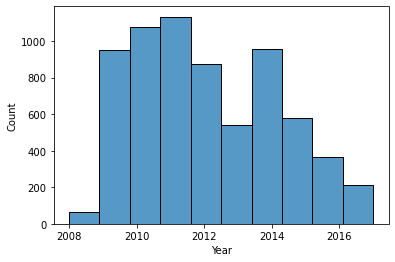

In [21]:
# Histogram plot to check distribution of rainfall according to Year
sns.histplot(df_rain['Year'],bins=10)

Obs- We can see The maximum rainfall have been observed in the year 2011,followed by 2010, 2009&2014  and so on, and the least in 2008, followed by 2017

<AxesSubplot:xlabel='Month', ylabel='Count'>

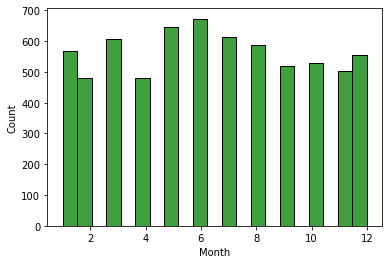

In [22]:
# Histogram plot to check distribution of attributes
sns.histplot(df_rain['Month'],color='g')

Obs- We can see the maximum Rainfall in the months of May-June-July, but we can see it rains throughout the year in Australia

PerthAirport    1204
Albury           907
Newcastle        822
Melbourne        811
Williamtown      615
CoffsHarbour     611
Brisbane         579
Penrith          482
Darwin           250
Wollongong       237
Adelaide         205
Uluru             39
Name: Location, dtype: int64


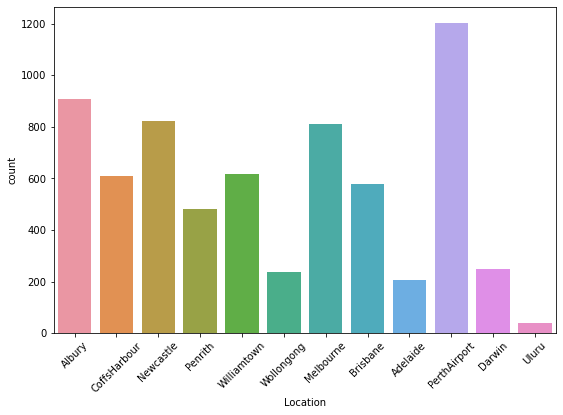

In [23]:
# Count plot to check individual value counts of 'gender'
print(df_rain['Location'].value_counts())

plt.figure(figsize=(9,6))
sns.countplot(df_rain['Location'])
plt.xticks(rotation=45)
plt.show()

Obs- We can see the maximum number of records of Rainfall recieved are for the location 'PerthAirport', followed by 'Albury','Newcatle' and the least number of records are for 'Uluru'

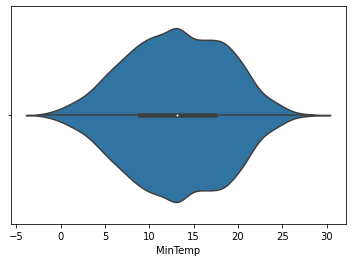

<Figure size 1440x576 with 0 Axes>

In [24]:
#Violin plot to check distribution of minimum temperature during rainfall
sns.violinplot(df_rain['MinTemp'])
plt.figure(figsize=(20,8))
plt.show()

Obs- We can see the min temp during rainfalls is registered as low as -0.3 degrees and sometimes even above 25 degrees

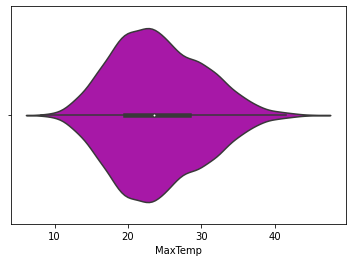

<Figure size 1440x576 with 0 Axes>

In [25]:
#Violin plot to check distribution of maximum temperature during rainfall
sns.violinplot(df_rain['MaxTemp'],color='m')
plt.figure(figsize=(20,8))
plt.show()

Obs- We can see the max temp during rainfalls is registered as low as 5-6 degrees and sometimes even above 40 degrees

E      1460
SW      465
N       459
W       434
WSW     420
WNW     398
SSE     390
S       376
SE      370
ENE     357
NE      300
SSW     299
NW      296
NNE     287
ESE     267
NNW     184
Name: WindGustDir, dtype: int64


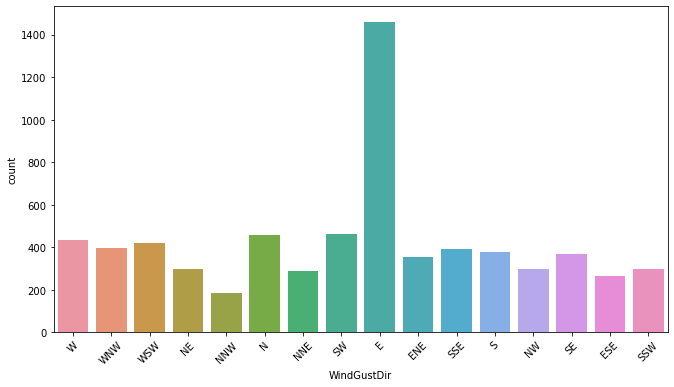

In [26]:
# Count plot to check individual value counts of WindGustDir'
print(df_rain['WindGustDir'].value_counts())

plt.figure(figsize=(11,6))
sns.countplot(df_rain['WindGustDir'])
plt.xticks(rotation=45)
plt.show()

Obs- The WindGust Direction is mostly in the EAst direction, followed by SouthWest and North direction

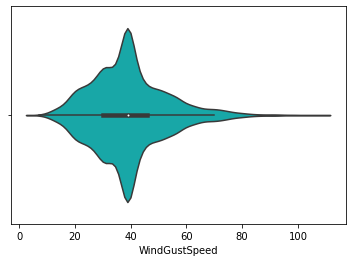

<Figure size 720x576 with 0 Axes>

In [27]:
#Violin plot to check distribution of WindGustSpeed during rainfall
sns.violinplot(df_rain['WindGustSpeed'],color='c')
plt.figure(figsize=(10,8))
plt.show()

Obs- The WindGust speed mostly falls in the range of 35-45, sometimes it has 0 speed and sometimes speed goes above 80 too

No     5190
Yes    1572
Name: RainToday, dtype: int64


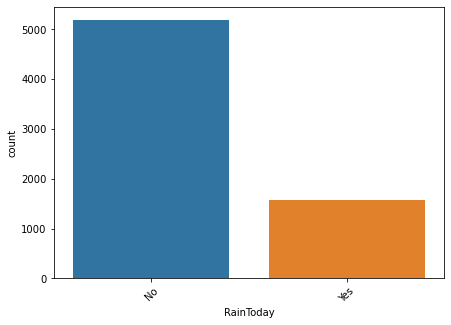

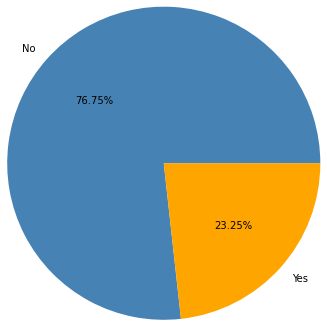

In [28]:
# Count plot to check individual value counts of RainToday'
print(df_rain['RainToday'].value_counts())

plt.figure(figsize=(7,5))
sns.countplot(df_rain['RainToday'])
plt.xticks(rotation=45)

fig, ax = plt.subplots()
ax.pie(df_rain['RainToday'].value_counts(),labels = ['No','Yes'], radius=1.8,autopct='%1.2f%%',colors=['steelblue','orange'])

plt.show()

Obs- As per the values of dataset, percentage of rainfall today is 23.25%, while percentage of no rainfall is 76.75%

No     5190
Yes    1572
Name: RainTomorrow, dtype: int64


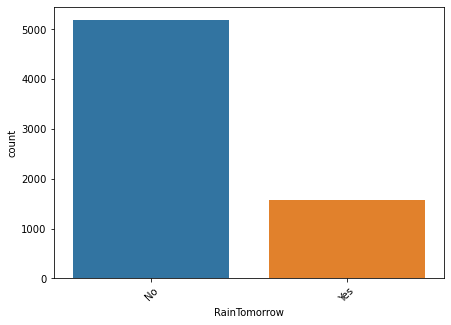

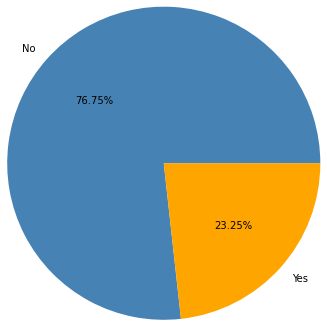

In [29]:
# Count plot to check individual value counts of RainTomorrow'
print(df_rain['RainTomorrow'].value_counts())

plt.figure(figsize=(7,5))
sns.countplot(df_rain['RainTomorrow'])
plt.xticks(rotation=45)

fig, ax = plt.subplots()
ax.pie(df_rain['RainTomorrow'].value_counts(),labels = ['No','Yes'], radius=1.8,autopct='%1.2f%%',colors=['steelblue','orange'])

plt.show()

Obs- The similar ratio for rainfall and no-rainfall falls for RainTomorrow

In [30]:
# Distribution plot to check skewness in the features

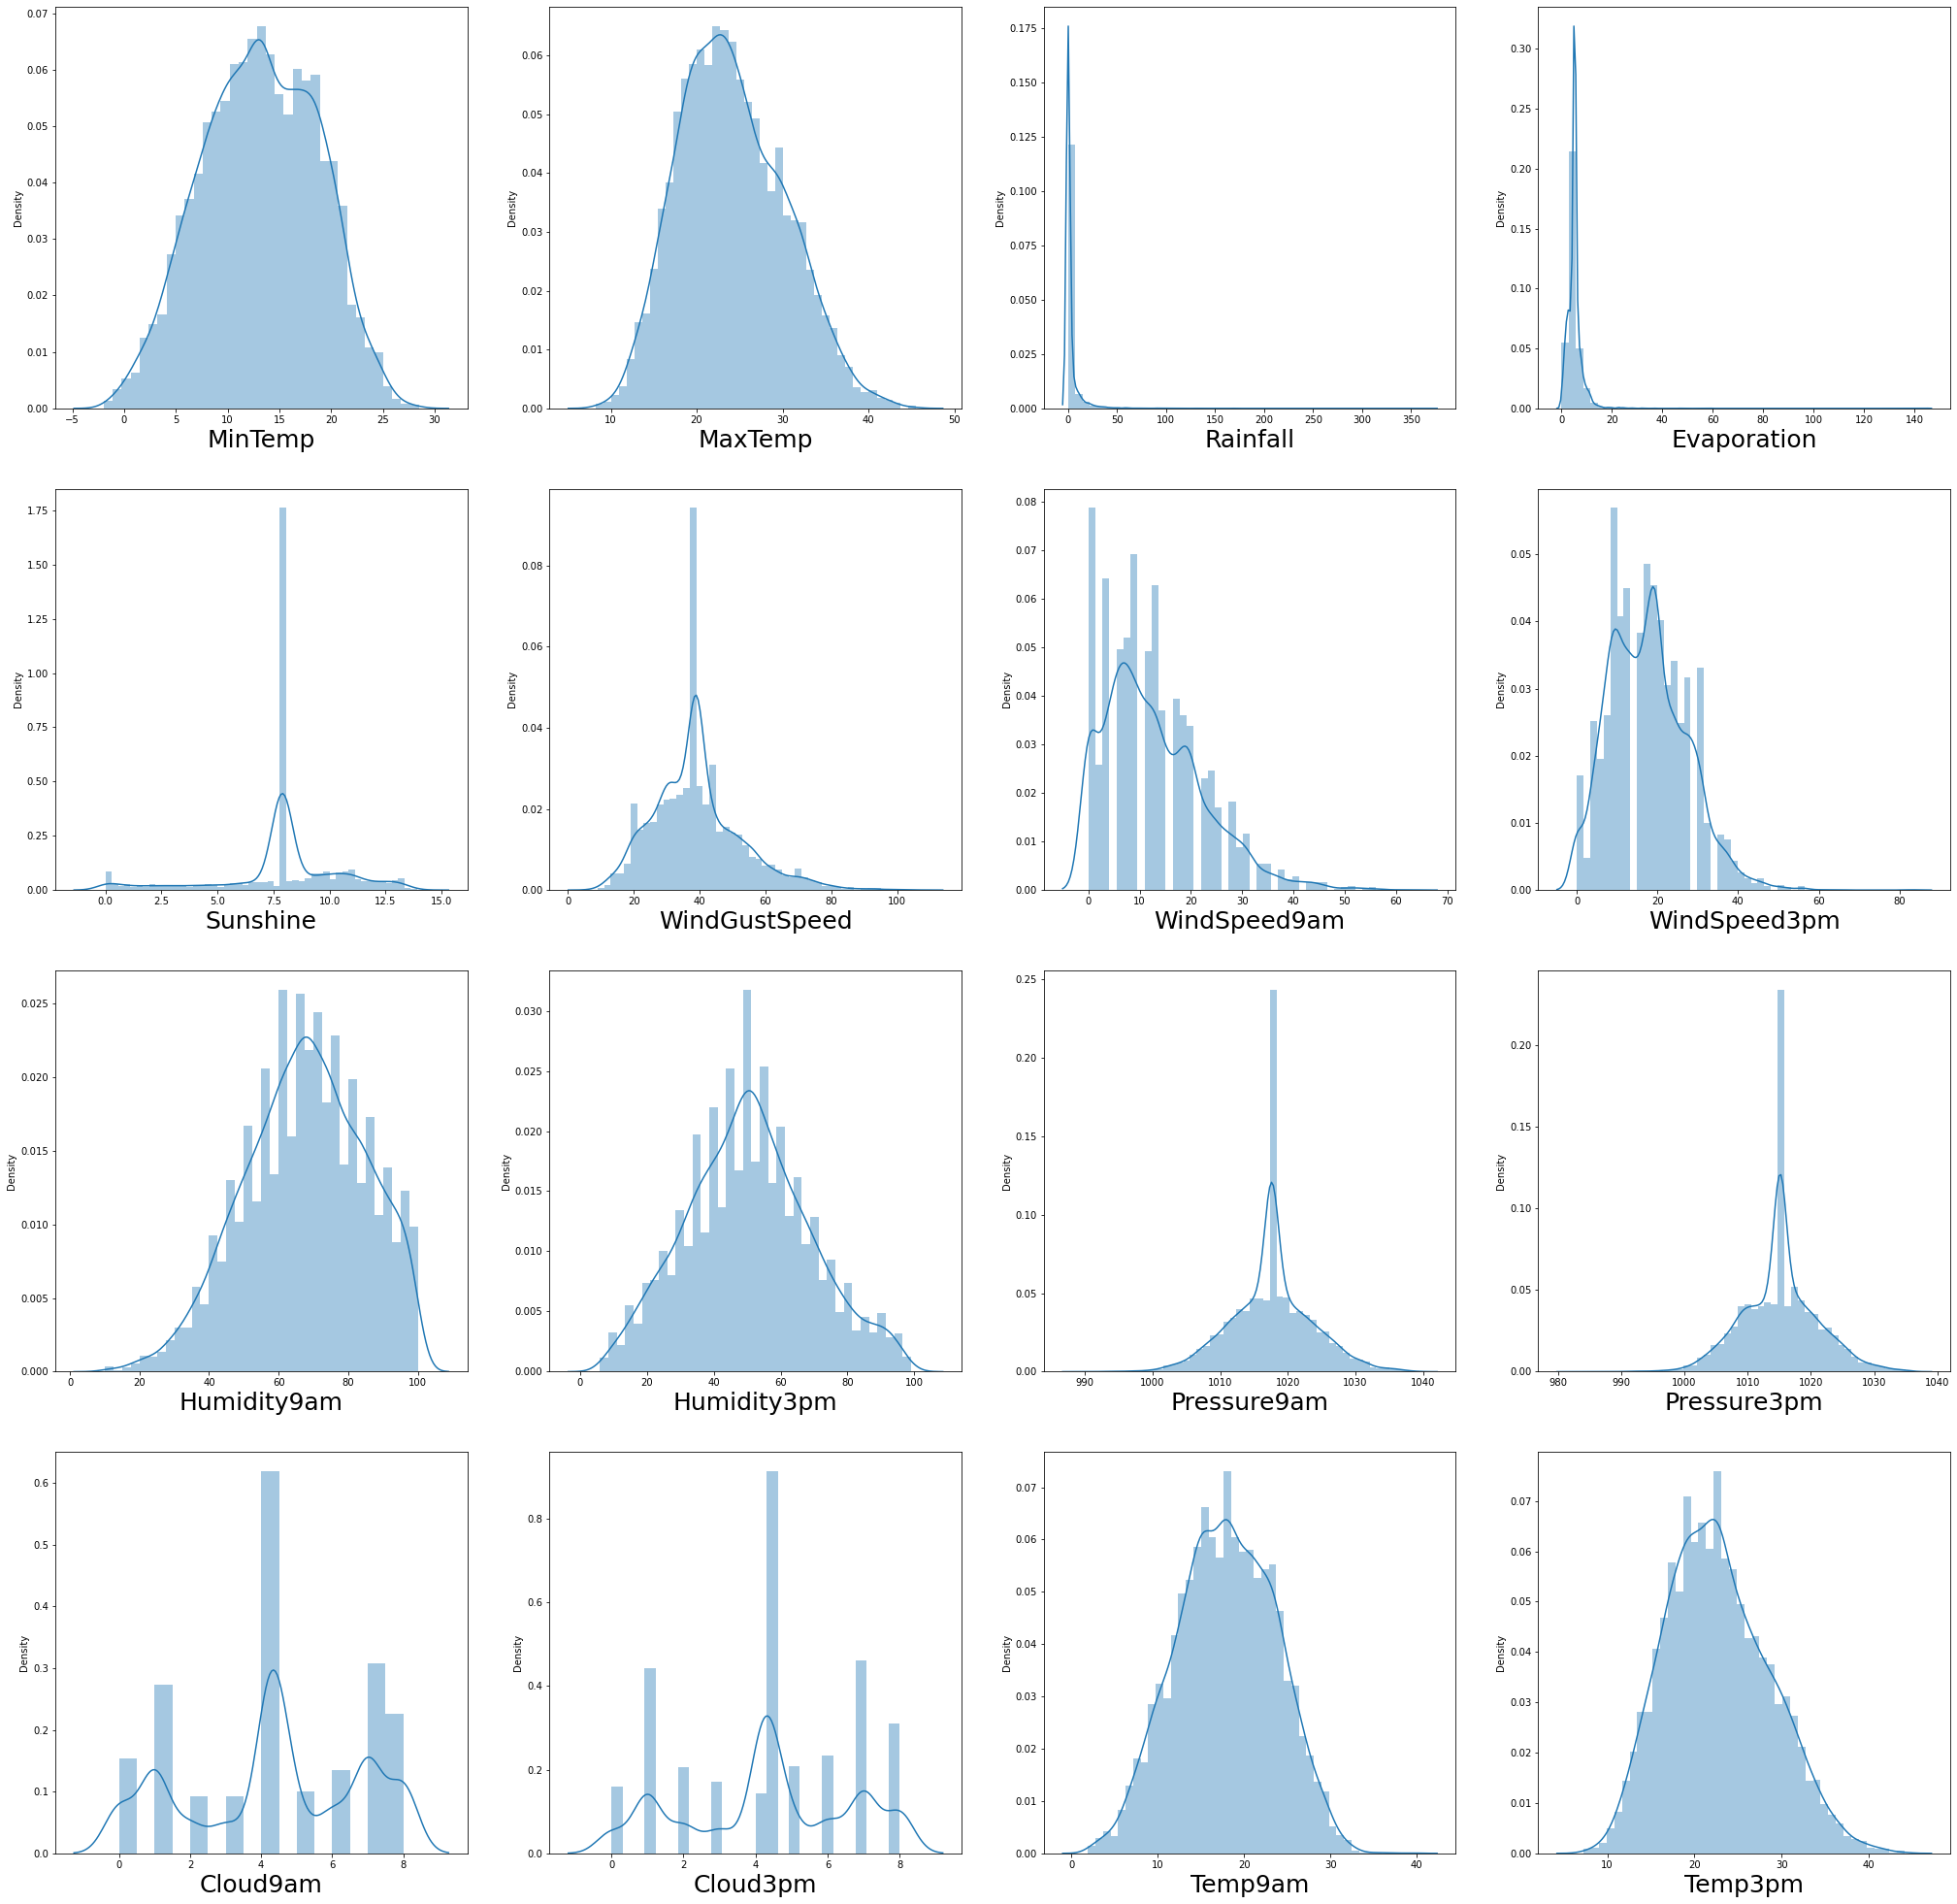

In [31]:
plt.figure(figsize=(35,35))
plotnumber=1

for column in df_rain[num_cols]:
    if plotnumber<=16: #as there are 16 numerical columns 
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(df_rain[column])
        plt.xlabel(column,fontsize=25)
    plotnumber +=1
plt.show()

obs- We can see right skewness in columns: 'MaxTemp', 'Rainfall', 'WindSpeed9am','WindSpeed3pm','Humidity3pm','Temp3pm' and left skewness in column 'Humidity9am' 

In [32]:
#box plot to check outliers

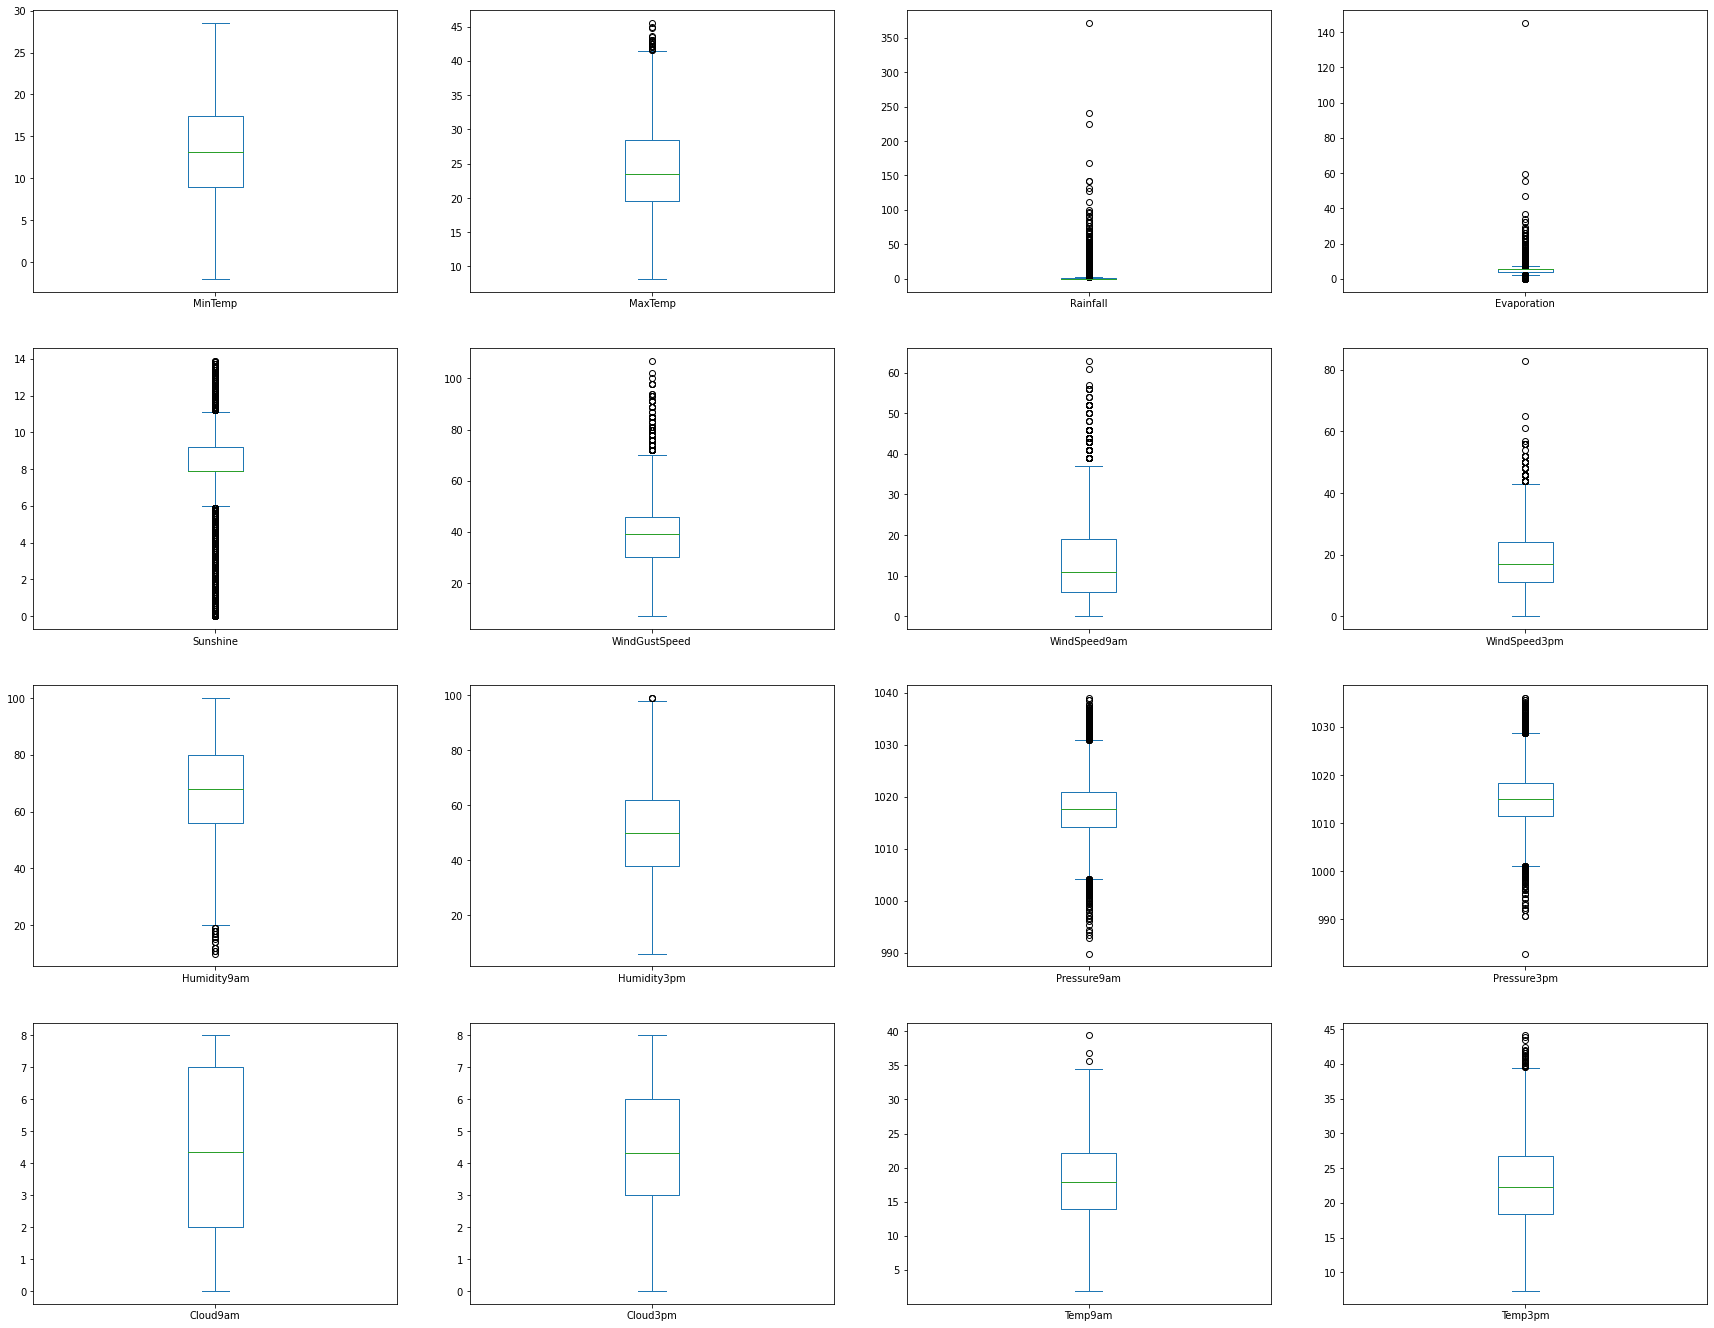

In [33]:
df_rain[num_cols].plot(kind='box',subplots=True,layout=(5,4),figsize=(30,30))
plt.show()

Obs- We can see outliers in columns: 'MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am'

### Bivariate Analysis

<AxesSubplot:xlabel='Year', ylabel='MinTemp'>

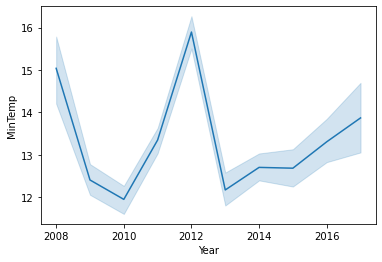

In [34]:
# Checking relationship between Year and Minimum Temperature recorded
sns.lineplot(x='Year',y='MinTemp', data=df_rain)

Obs- We can see min temperature of 15 degrees in 2008 which fell below 13 degrees for 2 years but after that went till 16 degrees in year 2012 and keeps fluctating over years

<AxesSubplot:xlabel='Year', ylabel='MaxTemp'>

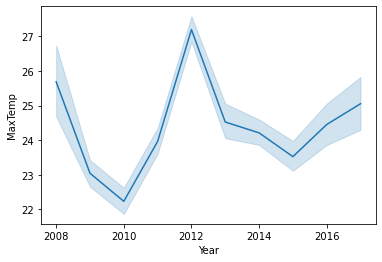

In [35]:
# Checking relationship between Year and Maximum Temperature recorded
sns.lineplot(x='Year',y='MaxTemp', data=df_rain)

Obs- The max tempertaure above 27 degrees is observed in year 2012, otherwise the max temperature Australia is generally below 25 degrees

<AxesSubplot:xlabel='Year', ylabel='Rainfall'>

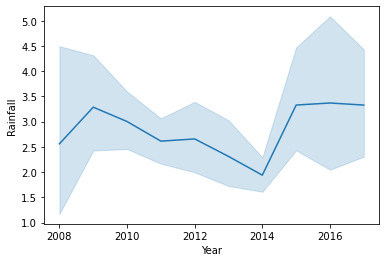

In [36]:
# Checking relationship between Year and Rainfall recorded
sns.lineplot(x='Year',y='Rainfall', data=df_rain)

Obs- The rainfall in Australia is generally above 2.5mm, except for year 2014, where it went to 2 mm

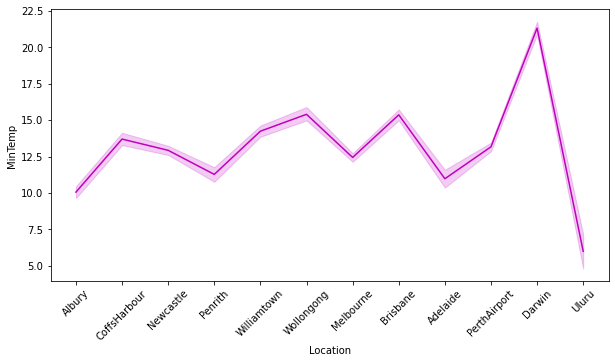

In [37]:
# Checking relationship between Location and MinTemp
plt.figure(figsize=(10,5))
sns.lineplot(x='Location',y='MinTemp', data=df_rain,color='m')
plt.xticks(rotation=45)
plt.show()

Obs- We can see the lowest mintemp has been recorded for the location, 'Uluru' and the mintemp is highest for location 'Darwin'

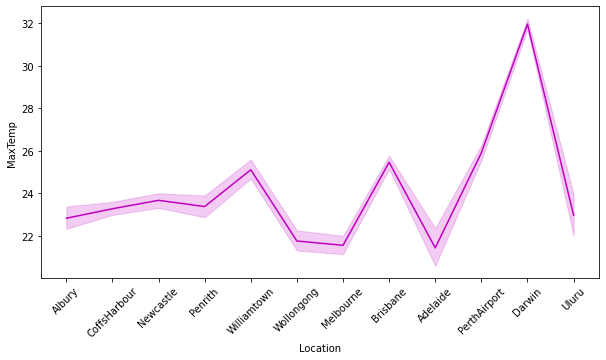

In [38]:
# Checking relationship between Location and MaxTemp
plt.figure(figsize=(10,5))
sns.lineplot(x='Location',y='MaxTemp', data=df_rain,color='m')
plt.xticks(rotation=45)
plt.show()

Obs- We can see the lowest maxtemp has been recorded for the location, 'Melbourne' and 'Adelaide' and the maxtemp is highest for location 'Darwin', Thus we can say Darwin is the hottest location of Australia

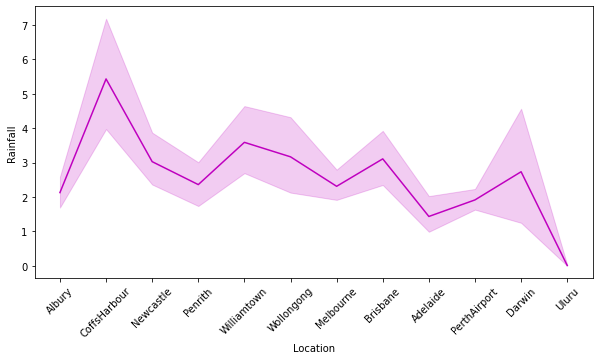

In [39]:
# Checking relationship between Location and Rainfall
plt.figure(figsize=(10,5))
sns.lineplot(x='Location',y='Rainfall', data=df_rain,color='m')
plt.xticks(rotation=45)
plt.show()

Obs- We can observe maximum rainfall in mmm for 'CoffsHarbour', followed by 'Williamtown' and the least for 'Uluru'

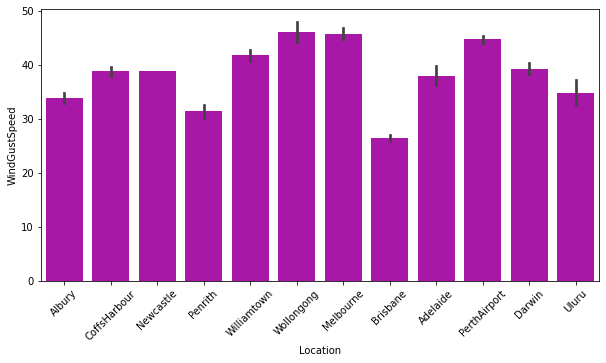

In [40]:
# Checking relationship between Location and WindGustSpeed
plt.figure(figsize=(10,5))
sns.barplot(x='Location',y='WindGustSpeed', data=df_rain,color='m')
plt.xticks(rotation=45)
plt.show()

Obs- The maximum WindGustSpeed is recorded for the location 'Wollongong', followed by 'Melbourne' and minimum for the loaction, 'Brisbane'

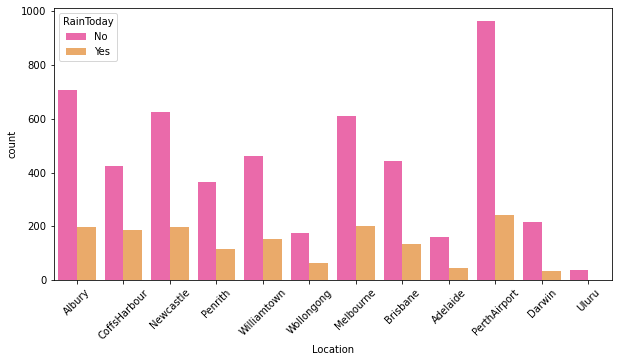

In [41]:
# Checking relationship between Location and RainToday
plt.figure(figsize=(10,5))
sns.countplot(x='Location', hue='RainToday', data=df_rain,palette='spring')
plt.xticks(rotation=45)
plt.show()

Obs- We can see out of the total number observation recorded, chances of Rainfall are max for 'CoffsHarbour' and no rainfall is recorded for 'Uluru'(As it is  a very coolo location as observed above)

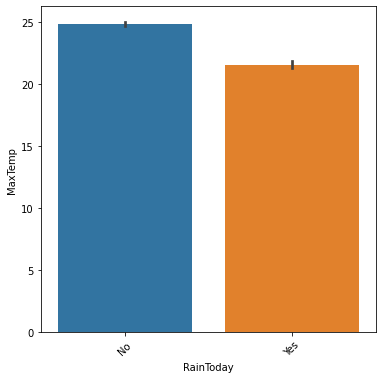

In [42]:
# Checking relationship between RainToday and MaxTemp
plt.figure(figsize=(6,6))
sns.barplot(x='RainToday',y='MaxTemp', data=df_rain)
plt.xticks(rotation=45)
plt.show()

Obs- We can see chancess of rainfall occurance is yes when the max temp is 22 or below it, but if the temperature exceeds 22 degreess chances of rainfall occurence is no

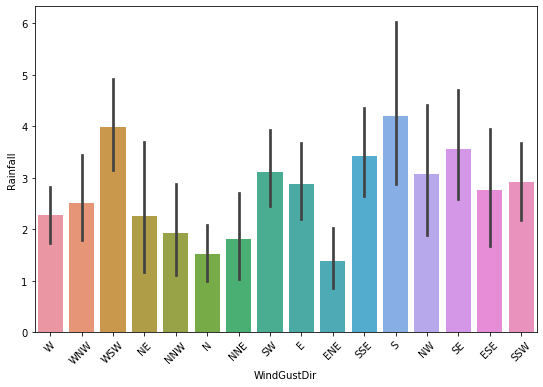

In [43]:
# Checking relationship between WindGustDir and Rainfall
plt.figure(figsize=(9,6))
sns.barplot(x='WindGustDir',y='Rainfall', data=df_rain)
plt.xticks(rotation=45)
plt.show()

Obs- We can see when the WindGustDir is in South direction, maximum intensity of Rain is observed, followed by when it is in WestSouthWest and the lowest intensity of rain is observed when the direction is EastNorthEast

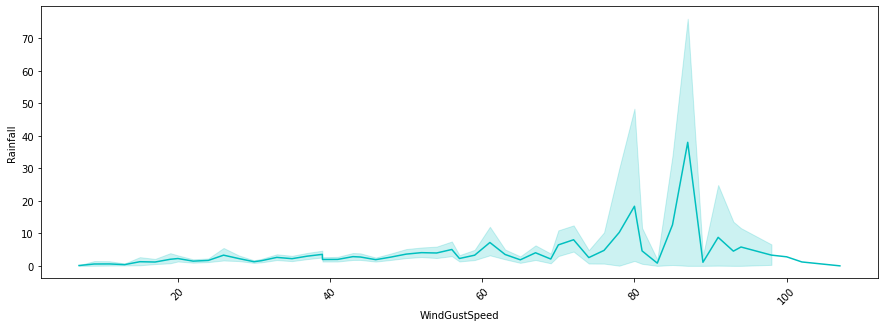

In [44]:
# Checking relationship between WindGustSpeed and Rainfall
plt.figure(figsize=(15,5))
sns.lineplot(x='WindGustSpeed',y='Rainfall', data=df_rain,color='c')
plt.xticks(rotation=45)
plt.show()

Obs- We can observe with the increase in WindGustSpeed, intensity of Rainfall also increases

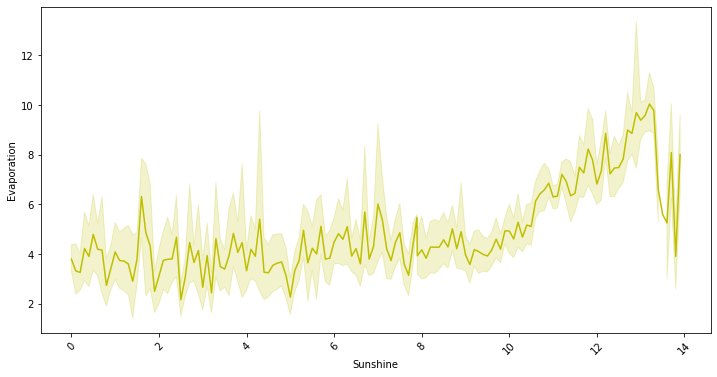

In [45]:
# Checking relationship between Sunshine and Evaporation
plt.figure(figsize=(12,6))
sns.lineplot(x='Sunshine',y='Evaporation', data=df_rain,color='y')
plt.xticks(rotation=45)
plt.show()

Obs- We can see with the increase intensity of sunshine, evaporation increses too

## Label Encoding

In [46]:
from sklearn.preprocessing import LabelEncoder

In [47]:
for col in df_rain[cat_cols[1:]]:   # range starting from 1 as we deleted Date column previously
    le = LabelEncoder()
    df_rain[col] = le.fit_transform(df_rain[col])

In [48]:
df_rain.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,1,13.4,22.9,0.6,5.302395,7.890896,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.320988,16.9,21.8,0,0,1,12,2008
1,1,7.4,25.1,0.0,5.302395,7.890896,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,4.336806,4.320988,17.2,24.3,0,0,2,12,2008
2,1,12.9,25.7,0.0,5.302395,7.890896,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,4.336806,2.000000,21.0,23.2,0,0,3,12,2008
3,1,9.2,28.0,0.0,5.302395,7.890896,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.336806,4.320988,18.1,26.5,0,0,4,12,2008
4,1,17.5,32.3,1.0,5.302395,7.890896,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0,0,5,12,2008


Obs- We can see all the categorical columns are been encoded with numerical values

## Checking Correlation

In [49]:
df_rain.corr()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
Location,1.000000,0.090425,0.070878,-0.003504,0.137894,0.065573,-0.086385,0.260031,-0.088884,-0.001275,0.240594,0.229770,-0.033657,-0.001483,-0.037657,-0.024508,-0.008566,-0.010776,0.098533,0.066331,-0.004280,-0.004506,-0.000710,-0.067376,0.503047
MinTemp,0.090425,1.000000,0.728065,0.092371,0.269812,0.039286,-0.136250,0.242738,-0.020766,-0.139552,0.169397,0.188276,-0.154248,0.067683,-0.441253,-0.440363,0.095403,0.047495,0.891425,0.696419,0.075933,0.097146,0.014344,-0.237177,0.032873
MaxTemp,0.070878,0.728065,1.000000,-0.087657,0.347231,0.355675,-0.195924,0.165528,-0.192684,-0.160967,0.056377,0.115623,-0.424951,-0.430526,-0.337845,-0.413150,-0.245116,-0.241542,0.866584,0.974695,-0.225749,-0.160318,0.016066,-0.171928,0.081622
Rainfall,-0.003504,0.092371,-0.087657,1.000000,-0.000755,-0.191656,0.027810,0.089987,0.091662,0.032052,0.051829,0.022696,0.228654,0.243394,-0.073004,-0.034081,0.196189,0.162653,-0.004172,-0.091987,0.459163,0.224213,-0.008658,-0.012896,-0.006992
Evaporation,0.137894,0.269812,0.347231,-0.000755,1.000000,0.266157,-0.091889,0.163857,-0.082329,-0.036871,0.132703,0.113176,-0.245437,-0.190148,-0.201959,-0.216711,-0.074490,-0.121875,0.317396,0.340045,-0.112552,-0.076733,0.009875,-0.008220,0.139220
Sunshine,0.065573,0.039286,0.355675,-0.191656,0.266157,1.000000,-0.099108,0.007625,-0.082495,-0.053334,0.008813,0.049033,-0.378872,-0.445111,-0.002095,-0.058151,-0.542442,-0.562537,0.236174,0.374244,-0.256123,-0.345509,0.001598,-0.004996,0.066165
WindGustDir,-0.086385,-0.136250,-0.195924,0.027810,-0.091889,-0.099108,1.000000,0.010034,0.378772,0.455305,0.062552,0.131120,0.015327,0.025385,-0.101039,-0.024369,0.115171,0.078248,-0.153232,-0.209048,0.112410,0.045179,0.013606,0.032066,-0.174132
WindGustSpeed,0.260031,0.242738,0.165528,0.089987,0.163857,0.007625,0.010034,1.000000,-0.071934,0.078165,0.591784,0.620606,-0.268973,-0.095502,-0.394164,-0.363104,0.013532,0.058182,0.221725,0.129756,0.085806,0.184435,-0.003225,0.049739,-0.028152
WindDir9am,-0.088884,-0.020766,-0.192684,0.091662,-0.082329,-0.082495,0.378772,-0.071934,1.000000,0.216648,0.057311,0.045487,0.015585,0.126725,-0.027555,0.051694,0.079312,0.058119,-0.071087,-0.201267,0.157884,0.040399,-0.014730,0.019799,-0.062314
WindDir3pm,-0.001275,-0.139552,-0.160967,0.032052,-0.036871,-0.053334,0.455305,0.078165,0.216648,1.000000,0.010744,0.084885,-0.005578,-0.009618,-0.139023,-0.049330,0.070565,0.050584,-0.146456,-0.174885,0.094507,0.004301,0.001723,0.034494,0.010694


<AxesSubplot:>

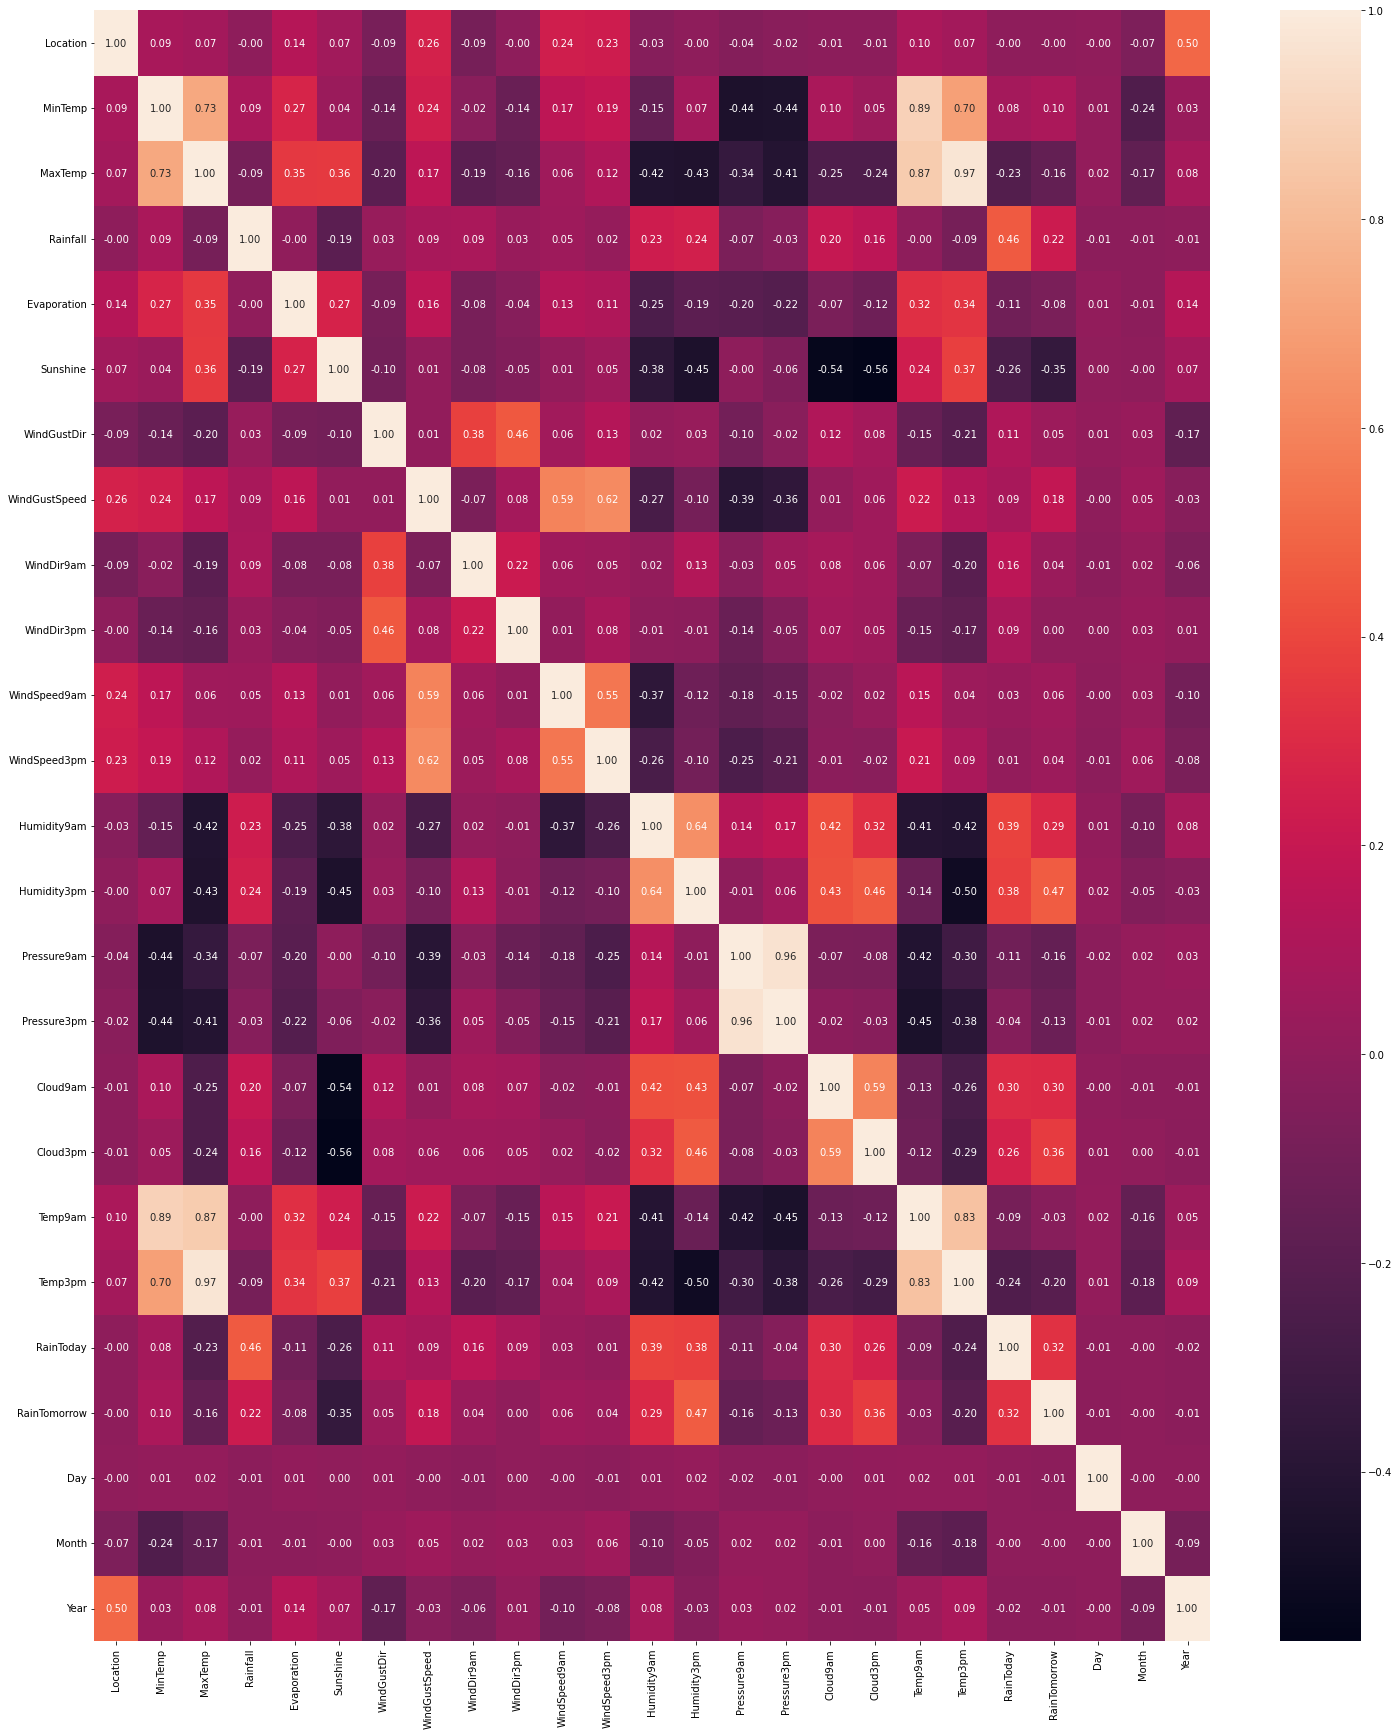

In [50]:
# Correlation using heatmap
plt.figure(figsize=(25,30))
sns.heatmap(df_rain.corr(),annot=True,fmt='0.2f')

Obs-We can see,

* highly positive correlated columns(>=0.7):('MinTemp and MaxTemp'),('MinTemp and Temp9am and Temp3pm'),('MaxTemp and Temp9am and Temp3pm'),('Rainfall and RainToday'),('Pressure9am and Pressure3pm')
* positive correlated columns(>=0.4):('Location and Year'),('WindGustDir and Wind3pm'),('Wind and WindGustspeed 9am and 3pm'),('RainTomorrow and Humidity3pm')
* highly negative correlated columns(>=-0.4):('MinTemp and Pressure9am and Pressure3pm'),('MaxTemp and Humidity9am and Humidity3pm'),('Sunshine and Cloud9am'),('Sunshine and Cloud3pm')
* negative correlated columns(>-0.2):('Sunshine and Humidity3pm'),('WindGustspeed 9am and 3pm and Pressure 9am and 3pm'),('WindGustspeed 9am and 3pm and Temp 9am and 3pm')


#### * We can also predict that multi-collinearity is present between (MinTemp and MaxTemp') and ('Temp9am and Temp3pm') and ('Pressure9am and Pressure3pm'), thus would be checking it through VIF and removing it later.

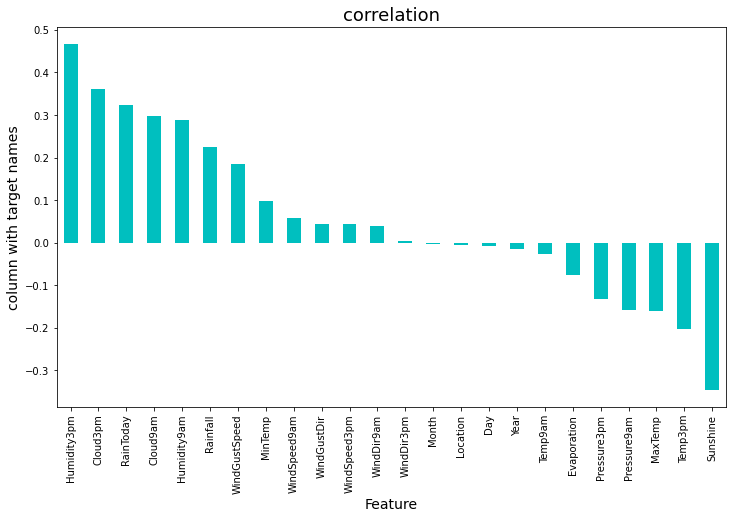

In [51]:
# Correlation of features with Target Column a)RainTomorrow
plt.figure(figsize=(12,7))
df_rain.corr()['RainTomorrow'].sort_values(ascending=False).drop(['RainTomorrow']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

Obs- The most positive correlated column for RainTomorrow is Humidity3pm and Cloud3pm, negative correlated are Sunshine and Temp3pm  and the least are 'Month','Location'

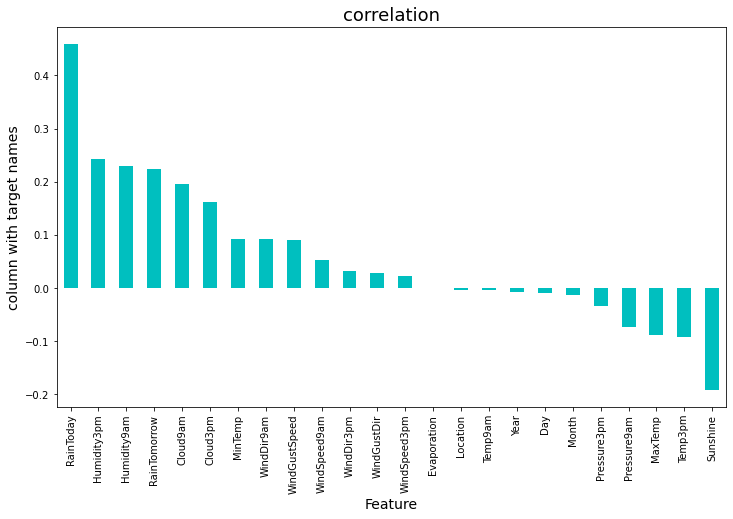

In [52]:
# Correlation of features with Target Column b)Rainfall
plt.figure(figsize=(12,7))
df_rain.corr()['Rainfall'].sort_values(ascending=False).drop(['Rainfall']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

Obs- The most positive correlated column for RainTomorrow is RainToday Humidity3pm and 9am, negative correlated are Sunshine and Temp3pm  and the least are 'Evaporation','Location'

## Detecting Outliers and Treating them

In [53]:
# Using Z-Score method
from scipy.stats import zscore
z=np.abs(zscore(df_rain[num_cols])) # detecting only numerical cols
threshold=3

In [54]:
df_rain_new=df_rain[num_cols][(z<3).all(axis=1)]

In [55]:
print("df_rain_new.shape:",df_rain_new.shape)

df_rain_new.shape: (6409, 16)


In [56]:
dropindx = df_rain.index.difference(df_rain_new.index)

In [57]:
dropindx

Int64Index([   8,   12,   44,   52,   60,   61,   62,   67,   68,  123,
            ...
            7873, 7983, 7984, 8024, 8054, 8100, 8136, 8144, 8145, 8185],
           dtype='int64', length=353)

In [58]:
df_rain.drop(dropindx,inplace = True) #dropping the outliers from original features Dataframe

In [59]:
df_rain.reset_index(drop=True,inplace = True)

In [60]:
df_rain.shape

(6409, 25)

## Model Building

## (Approach 1: 'Classification Model to find whether or not it will rain tomorrow. )

### Data Preprocessing

### Seperating Input and Target variables

In [61]:
x=df_rain.drop(columns='RainTomorrow')
y=df_rain['RainTomorrow']

In [62]:
x.shape

(6409, 24)

In [63]:
y.shape

(6409,)

### Data Transformation to treat Skewness

#### Checking Skewness

In [64]:
x[num_cols].skew()

MinTemp         -0.079107
MaxTemp          0.265797
Rainfall         3.515410
Evaporation      0.721400
Sunshine        -0.890629
WindGustSpeed    0.477235
WindSpeed9am     0.677433
WindSpeed3pm     0.341549
Humidity9am     -0.233044
Humidity3pm      0.158509
Pressure9am      0.064023
Pressure3pm      0.090093
Cloud9am        -0.203578
Cloud3pm        -0.147217
Temp9am         -0.072513
Temp3pm          0.290192
dtype: float64

obs- keeping the acceptable range +/- 0.5, we can see skewness is present in columns 'Rainfall','Evaporation','Sunshine', WindSpeed9am'

Applying transformation method to treat the skewness

#### Applying Transformation Method

In [65]:
x=pd.DataFrame(x)
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer() 
skew_col = ['Rainfall','Sunshine','Evaporation','WindSpeed9am']
x[skew_col]= pt.fit_transform(x[skew_col].values)

In [66]:
# Rechecking the skewness
x[num_cols].skew()

MinTemp         -0.079107
MaxTemp          0.265797
Rainfall         0.970931
Evaporation      0.071784
Sunshine        -0.054513
WindGustSpeed    0.477235
WindSpeed9am    -0.132158
WindSpeed3pm     0.341549
Humidity9am     -0.233044
Humidity3pm      0.158509
Pressure9am      0.064023
Pressure3pm      0.090093
Cloud9am        -0.203578
Cloud3pm        -0.147217
Temp9am         -0.072513
Temp3pm          0.290192
dtype: float64

Obs- We can see the except for 'Rainfall', Skewness has gone from all those columns that contained it, not removing the skewness further from 'Rainfall' as log-transformation is converting data to zero, and boxcox is creting null values

### Data Scaling

In [67]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
x_scale=st.fit_transform(x)
x_scale=pd.DataFrame(x_scale)

In [68]:
x=pd.DataFrame(data=x_scale)

### Checking Multi-Collinearity

In [69]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [70]:
def vif_cal():
    vif=pd.DataFrame()
    vif['VIF Factor']=[variance_inflation_factor(x.values,i)for i in range(x.shape[1])]
    vif['Features']=x.columns
    print(vif)

vif_cal()

    VIF Factor  Features
0     1.651813         0
1     9.322934         1
2    26.308421         2
3     5.371374         3
4     1.654211         4
5     2.164338         5
6     1.586956         6
7     2.183453         7
8     1.347938         8
9     1.421436         9
10    2.017992        10
11    1.963554        11
12    4.171326        12
13    5.449977        13
14   20.312154        14
15   19.504309        15
16    2.017495        16
17    1.922979        17
18   17.998610        18
19   32.563471        19
20    4.862785        20
21    1.005237        21
22    1.149740        22
23    1.586691        23


* (Feature Denoted as: 0:Location',1:'MinTemp',2:'MaxTemp',3:'Rainfall',4:'Evaporation',5:'Sunshine',6:'WindGustDir',7:'WindGustSpeed',8:'WindDir9am',9:'WindDir3pm',10:'WindSpeed9am',11:'WindSpeed3pm',12:'Humidity9am',13:'Humidity3pm',14:'Pressure9am',15:'Pressure3pm',16:'Cloud9am',17:'Cloud3pm',18:'Temp9am',19:'Temp3pm',20:'RainToday',21:'Day', 22:'Month',23:'Year') 


* Keeping the acceptable range as below or equal 10, we observe the VIF of 2:'MaxTemp', 14:'Pressure9am', 15:'Pressure3pm',18:'Temp9am',19:'Temp3pm' is high


* Deleting the columns 18:'Temp9am' and 19:'Temp3pm' as they have high VIF and also they have sytong correlation with mintemp and maxtemp 

In [71]:
x.drop(18, axis =1, inplace=True) # Dropping 'Temp9am' column

In [72]:
x.drop(19, axis =1, inplace=True) # Dropping 'Temp3pm' column

In [73]:
x.shape

(6409, 22)

In [74]:
# Rechecking the VIF
vif_cal()

    VIF Factor  Features
0     1.649227         0
1     4.986941         1
2     5.875642         2
3     5.365353         3
4     1.633147         4
5     2.132740         5
6     1.581033         6
7     2.134908         7
8     1.346094         8
9     1.420347         9
10    1.996837        10
11    1.914162        11
12    2.640205        12
13    2.950119        13
14   19.792116        14
15   19.079428        15
16    2.001206        16
17    1.909670        17
18    4.851143        20
19    1.004756        21
20    1.119846        22
21    1.579621        23


Obs- We can see VIF of columns 14:'Pressure9am', 15:'Pressure3pm', is still high, so deleting 14:'Pressure9am' the column to reduce multicollinearity

In [75]:
x.drop(14, axis =1, inplace=True) # Dropping 'Pressure9am'' column

In [76]:
x.shape

(6409, 21)

In [77]:
# Rechecking the VIF
vif_cal()

    VIF Factor  Features
0     1.646321         0
1     4.815226         1
2     5.643919         2
3     5.334887         3
4     1.613550         4
5     2.122285         5
6     1.567417         6
7     2.120841         7
8     1.320544         8
9     1.350248         9
10    1.990172        10
11    1.900927        11
12    2.638399        12
13    2.950084        13
14    1.458420        15
15    1.999213        16
16    1.908455        17
17    4.850869        20
18    1.003679        21
19    1.119099        22
20    1.578043        23


Obs- We can see no multicollinearity in the data now

### Checking for Imbalance

In [78]:
print(y.value_counts())

0    4979
1    1430
Name: RainTomorrow, dtype: int64


Obs- We can see the data is imbalanced, balancing it using Oversampling below

### Oversampling using SMOTE

In [79]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x,y= SM.fit_resample(x,y)

In [80]:
print(y.value_counts())

0    4979
1    4979
Name: RainTomorrow, dtype: int64


### Data Modelling(Classification Model)

In [81]:
# Finding best Random State

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    lg = LogisticRegression()
    lg.fit(x_train, y_train)
    predlg = lg.predict(x_test)
    acc=accuracy_score(y_test, predlg)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8032128514056225  on Random_state  41


#### Splitting data into Train-Test

In [129]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=41)

In [130]:
x_train.shape

(6970, 21)

In [131]:
y_train.shape

(6970,)

In [132]:
x_test.shape

(2988, 21)

In [133]:
y_test.shape

(2988,)

### Using various Machine Learning Algorithms

In [134]:
#importing necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

#### 1. Logistic Regression

In [135]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
predlg=lg.predict(x_test)
print("Accuracy:",accuracy_score(y_test,predlg))
print("Confusion Matrix:\n",confusion_matrix(y_test,predlg))
print("Classification Report:\n",classification_report(y_test,predlg))

Accuracy: 0.8032128514056225
Confusion Matrix:
 [[1204  306]
 [ 282 1196]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.80      0.80      1510
           1       0.80      0.81      0.80      1478

    accuracy                           0.80      2988
   macro avg       0.80      0.80      0.80      2988
weighted avg       0.80      0.80      0.80      2988



Obs- The Logistic Regression has provided the accuracy_score:0.8032128514056225 and f1-score:0.80

#### 2. GaussianNB

In [136]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
predgnb=gnb.predict(x_test)
print("Accuracy:",accuracy_score(y_test,predgnb))
print("Confusion Matrix:\n",confusion_matrix(y_test,predgnb))
print("Classification Report:\n",classification_report(y_test,predgnb))

Accuracy: 0.751004016064257
Confusion Matrix:
 [[1138  372]
 [ 372 1106]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.75      0.75      1510
           1       0.75      0.75      0.75      1478

    accuracy                           0.75      2988
   macro avg       0.75      0.75      0.75      2988
weighted avg       0.75      0.75      0.75      2988



Obs- The GaussianNB has provided the accuracy_score: 0.751004016064257 and f1-score:0.75

#### 3.Decision Tree Classifier

In [137]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print("Accuracy:",accuracy_score(y_test,preddtc))
print("Confusion Matrix:\n",confusion_matrix(y_test,preddtc))
print("Classification Report:\n",classification_report(y_test,preddtc))

Accuracy: 0.8299866131191432
Confusion Matrix:
 [[1235  275]
 [ 233 1245]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.82      0.83      1510
           1       0.82      0.84      0.83      1478

    accuracy                           0.83      2988
   macro avg       0.83      0.83      0.83      2988
weighted avg       0.83      0.83      0.83      2988



Obs- The Decision Tree Classifier has provided the accuracy-score:0.8299866131191432 and f1-score:0.83

#### 4.K Nearest Neighbor Classifier

In [138]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
print("Accuracy:",accuracy_score(y_test,predknn))
print("Confusion Matrix:\n",confusion_matrix(y_test,predknn))
print("Classification Report:\n",classification_report(y_test,predknn))

Accuracy: 0.8453815261044176
Confusion Matrix:
 [[1109  401]
 [  61 1417]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.73      0.83      1510
           1       0.78      0.96      0.86      1478

    accuracy                           0.85      2988
   macro avg       0.86      0.85      0.84      2988
weighted avg       0.86      0.85      0.84      2988



Obs- The K Nearest Neighbor Classifier has provided the accuracy-score:0.8453815261044176 and f1-score:0.83

#### 5.Support Vector Machine Classifier

In [139]:
svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print("Accuracy:",accuracy_score(y_test,predsvc))
print("Confusion Matrix:\n",confusion_matrix(y_test,predsvc))
print("Classification Report:\n",classification_report(y_test,predsvc))

Accuracy: 0.8544176706827309
Confusion Matrix:
 [[1254  256]
 [ 179 1299]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.83      0.85      1510
           1       0.84      0.88      0.86      1478

    accuracy                           0.85      2988
   macro avg       0.86      0.85      0.85      2988
weighted avg       0.86      0.85      0.85      2988



Obs- The Support Vector Machine Classifier has provided the accuracy-score:0.8544176706827309 and f1-score:0.85

#### 6. Ensemble Methods
##### 6.1 Random Forest Classifier

In [140]:
rf=RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print("Accuracy:",accuracy_score(y_test,predrf))
print("Confusion Matrix:\n",confusion_matrix(y_test,predrf))
print("Classification Report:\n",classification_report(y_test,predrf))

Accuracy: 0.9086345381526104
Confusion Matrix:
 [[1339  171]
 [ 102 1376]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.89      0.91      1510
           1       0.89      0.93      0.91      1478

    accuracy                           0.91      2988
   macro avg       0.91      0.91      0.91      2988
weighted avg       0.91      0.91      0.91      2988



Obs- The Random Forest Classifier has provided the accuracy-score:0.9086345381526104 and f1-score:0.91

##### 6.2 Ada Boost Classifier

In [141]:
ad=AdaBoostClassifier(n_estimators=50,learning_rate=1.0)
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
print("Accuracy:",accuracy_score(y_test,predad))
print("Confusion Matrix:\n",confusion_matrix(y_test,predad))
print("Classification Report:\n",classification_report(y_test,predad))

Accuracy: 0.8457161981258366
Confusion Matrix:
 [[1266  244]
 [ 217 1261]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.84      0.85      1510
           1       0.84      0.85      0.85      1478

    accuracy                           0.85      2988
   macro avg       0.85      0.85      0.85      2988
weighted avg       0.85      0.85      0.85      2988



Obs- The Ada Boost Classifier has provided the accuracy-score:0.8457161981258366 and f1-score:0.85

##### 6.3 Gradient Boosting Classifier

In [142]:
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
predgb=gb.predict(x_test)
print("Accuracy:",accuracy_score(y_test,predgb))
print("Confusion Matrix:\n",confusion_matrix(y_test,predgb))
print("Classification Report:\n",classification_report(y_test,predgb))

Accuracy: 0.8788487282463187
Confusion Matrix:
 [[1325  185]
 [ 177 1301]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88      1510
           1       0.88      0.88      0.88      1478

    accuracy                           0.88      2988
   macro avg       0.88      0.88      0.88      2988
weighted avg       0.88      0.88      0.88      2988



Obs- The Gradient Boosting Classifier has provided the accuracy-score:0.8788487282463187and f1-score:0.88

### Cross Validation

In [96]:
from sklearn.model_selection import cross_val_score

In [143]:
# Using of K-Fold cross-validation technique

predlg= lg.predict(x_test)

from sklearn.model_selection import cross_val_score

test_accuracy= accuracy_score(y_test,predlg)

for j in range(5,11):
    cv_score=cross_val_score(lg,x,y,cv=j)
    cv_mean= cv_score.mean()
    print('At cv:',j)
    print('Cross_Validation_score is:',cv_mean*100)
    print('Accuracy is :',test_accuracy*100)
    print("\n")

At cv: 5
Cross_Validation_score is: 72.0640926337192
Accuracy is : 80.32128514056225


At cv: 6
Cross_Validation_score is: 71.65297113711023
Accuracy is : 80.32128514056225


At cv: 7
Cross_Validation_score is: 74.21327142098912
Accuracy is : 80.32128514056225


At cv: 8
Cross_Validation_score is: 72.95840919949896
Accuracy is : 80.32128514056225


At cv: 9
Cross_Validation_score is: 73.99160800930893
Accuracy is : 80.32128514056225


At cv: 10
Cross_Validation_score is: 74.0528647252326
Accuracy is : 80.32128514056225




Obs- Selecting the fold value as 7

In [144]:
# cv score for Logistic Regression 
cvlg=cross_val_score(lg,x,y,cv=7).mean()
print('CV score  for Logistic Regression:',cvlg)
print("And Difference between CV and accuracy_score=", accuracy_score(y_test,predlg)-cvlg)

CV score  for Logistic Regression: 0.7421327142098911
And Difference between CV and accuracy_score= 0.061080137195731354


In [145]:
# cv score for GaussianNB 
cvgnb=cross_val_score(gnb,x,y,cv=7).mean()
print('CV score  for Gaussian NB:',cvgnb)
print("And Difference between CV and accuracy_score=", accuracy_score(y_test,predgnb)-cvgnb)

CV score  for Gaussian NB: 0.7261583890252152
And Difference between CV and accuracy_score= 0.024845627039041807


In [146]:
# cv score for Decision Tree Classifier 
cvdtc=cross_val_score(dtc,x,y,cv=7).mean()
print('CV score  for Decision Tree Classifier:',cvdtc)
print("And Difference between CV and accuracy_score=", accuracy_score(y_test,preddtc)-cvdtc)

CV score  for Decision Tree Classifier: 0.7158290751652965
And Difference between CV and accuracy_score= 0.11415753795384675


In [147]:
# cv score for K Neighbors Classifier 
cvknn=cross_val_score(knn,x,y,cv=7).mean()
print('CV score  for K Neighbors Clssifier:',cvknn)
print("And Difference between CV and accuracy_score=", accuracy_score(y_test,predknn)-cvknn)

CV score  for K Neighbors Clssifier: 0.7157288954348119
And Difference between CV and accuracy_score= 0.12965263066960575


In [151]:
# cv score for Support Vector Machine Classifier 
cvsvc=cross_val_score(svc,x,y,cv=7).mean()
print('CV score  for Support Vector Classifier:',cvsvc)
print("And Difference between CV and accuracy_score=", accuracy_score(y_test,predsvc)-cvsvc)

CV score  for Support Vector Classifier: 0.7347114364869688
And Difference between CV and accuracy_score= 0.1197062341957621


In [148]:
# cv score for Random Forest Classifier
cvrf=cross_val_score(rf,x,y,cv=7).mean()
print('CV score  for RandomForestClassifier:',cvrf)
print("And Difference between CV and accuracy_score=", accuracy_score(y_test,predrf)-cvrf)

CV score  for RandomForestClassifier: 0.7437593817011521
And Difference between CV and accuracy_score= 0.16487515645145834


In [149]:
# cv score for Ada Boost Classifier
cvad=cross_val_score(ad,x,y,cv=3).mean()
print('CV score  for Ada Boost Classifier:',cvad)
print("And Difference between CV and accuracy_score=", accuracy_score(y_test,predad)-cvad)

CV score  for Ada Boost Classifier: 0.6008253562608373
And Difference between CV and accuracy_score= 0.24489084186499932


In [150]:
# cv score for GradientBoostingClassifier
cvgb=cross_val_score(gb,x,y,cv=3).mean()
print('CV score  for Gradienty Boosting Classifier:',cvgb)
print("And Difference between CV and accuracy_score=", accuracy_score(y_test,predgb)-cvgb)

CV score  for Gradienty Boosting Classifier: 0.5832529878477453
And Difference between CV and accuracy_score= 0.2955957403985734


Obs- 
* We can observe the difference between CV score and r2_score is least in the model GaussianNB.

Finding best parmeters for GaussianNB using hyper tuning below

### Hyper Parameter Tuning

In [106]:
gnb.get_params()

{'priors': None, 'var_smoothing': 1e-09}

As there is no much parameters that affect GaussianNB, we will treat the default GNB as our best model.

### Plotting ROC-AUC curve for best model

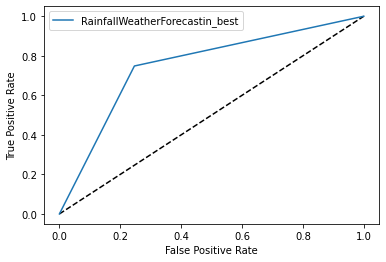

In [152]:
fpr,tpr,threshholds=roc_curve(y_test,predgnb)
auc = roc_auc_score(y_test,predgnb)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='RainfallWeatherForecastin_best')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

Obs- The best model ie. GaussianNB Classifier has AUC(area under curve)=  75%

### Saving the best classification model

In [153]:
import joblib

joblib.dump(gnb,'RainTomorrow.obj')

['RainTomorrow.obj']

In [154]:
RainTomorrow_model=joblib.load('RainTomorrow.obj')

In [155]:
RainTomorrow_model

GaussianNB()

### Predicting the Output

In [160]:
ori = np.array(y_test)
predicted = np.array(RainTomorrow_model.predict(x_test))
df_new = pd.DataFrame({"Original":ori,"Predicted":predicted},index= range(len(ori)))
df_new.sample(10)

,Original,Predicted
628,1,1
1370,0,0
1016,0,0
2560,1,1
2373,1,1
1721,0,0
1640,0,0
1828,1,1
561,0,0
2516,0,0


Obs- We can see our best model has given majorly the same results as original

Text(0.5, 1.0, 'Original vs predicted  graph')

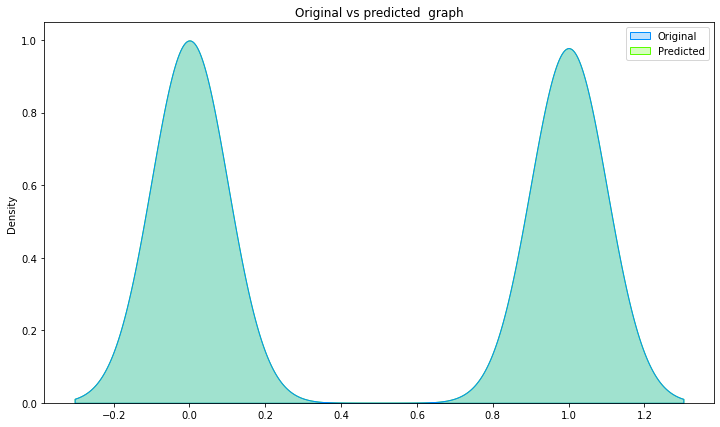

In [161]:
# Viewing the difference of prediction using Visualization 
plt.figure(figsize=(12,7))
sns.kdeplot(data=df_new, palette='gist_rainbow_r',gridsize=900, shade=True)
plt.title('Original vs predicted  graph')

Obs- We can observe little difference in predicted and the original outputs graph

### Concluding Remarks for Classification Model

* We have predicted the outcome of RainTomorrow in Australia by collecting the dataset of Rainfall Weather Forecasting having different records of temp, humidity, sunshine, pressure variations according to day and night of various locations
* We classified the output of "RainTomorrow" using classification model. The prediction accuracies of these models were then checked.
* Also cross-validation was performed to avoid overfitting of models.
* The prediction results indicated that GradientBoosting Classifier model achieved higher prediction accuracy.

## (Approach 2: 'Regression Model to predict how much rainfall could be there. )

### Data Preprocessing

### Seperating Input and Target variables

In [113]:
x1=df_rain.drop(columns='Rainfall')
y1=df_rain['Rainfall']

In [114]:
x1.shape

(6409, 24)

In [115]:
y1.shape

(6409,)

### Data Transformation to treat Skewness

#### Checking Skewness

In [116]:
x1.skew()

Location         0.004558
MinTemp         -0.079107
MaxTemp          0.265797
Evaporation      0.721400
Sunshine        -0.890629
WindGustDir      0.103596
WindGustSpeed    0.477235
WindDir9am       0.210848
WindDir3pm      -0.128886
WindSpeed9am     0.677433
WindSpeed3pm     0.341549
Humidity9am     -0.233044
Humidity3pm      0.158509
Pressure9am      0.064023
Pressure3pm      0.090093
Cloud9am        -0.203578
Cloud3pm        -0.147217
Temp9am         -0.072513
Temp3pm          0.290192
RainToday        1.331440
RainTomorrow     1.330358
Day              0.004771
Month            0.032770
Year             0.352924
dtype: float64

obs- keeping the acceptable range +/- 0.5, we can see skewness is present in columns: 'Evaporation','Sunshine','WindSpeed9am','RainToday','RainTomorrow'

but since 'RainToday','RainTomorrow' are categorical columns, we will not remove skewness from them 

#### Applying Transformation Method

In [117]:
x1=pd.DataFrame(x1)
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer() 
skew_col = ['Sunshine','Evaporation','WindSpeed9am']
x1[skew_col]= pt.fit_transform(x1[skew_col].values)

In [118]:
# Rechecking the skewness
x1.skew()

Location         0.004558
MinTemp         -0.079107
MaxTemp          0.265797
Evaporation      0.071784
Sunshine        -0.054513
WindGustDir      0.103596
WindGustSpeed    0.477235
WindDir9am       0.210848
WindDir3pm      -0.128886
WindSpeed9am    -0.132158
WindSpeed3pm     0.341549
Humidity9am     -0.233044
Humidity3pm      0.158509
Pressure9am      0.064023
Pressure3pm      0.090093
Cloud9am        -0.203578
Cloud3pm        -0.147217
Temp9am         -0.072513
Temp3pm          0.290192
RainToday        1.331440
RainTomorrow     1.330358
Day              0.004771
Month            0.032770
Year             0.352924
dtype: float64

Obs- We can see skewness has been removed from those columns on which transformation was applied

### Data Scaling

In [119]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
x1_scale=st.fit_transform(x1)
x1_scale=pd.DataFrame(x1_scale)

In [120]:
x1=pd.DataFrame(data=x1_scale)

### Checking Multi-Collinearity

In [121]:
def vif_cal1():
    vif1=pd.DataFrame()
    vif1['VIF Factor']=[variance_inflation_factor(x1.values,i)for i in range(x1.shape[1])]
    vif1['Features']=x1.columns
    print(vif1)

vif_cal1()

    VIF Factor  Features
0     1.658933         0
1     9.244157         1
2    26.322226         2
3     1.643293         3
4     2.188432         4
5     1.590691         5
6     2.260706         6
7     1.348053         7
8     1.422001         8
9     2.019553         9
10    1.969223        10
11    4.132236        11
12    5.727368        12
13   20.279158        13
14   19.565807        14
15    2.017089        15
16    1.933862        16
17   17.983108        17
18   32.563102        18
19    1.402999        19
20    1.474364        20
21    1.004912        21
22    1.144643        22
23    1.583717        23


* (Feature Denoted as: 0:Location',1:'MinTemp',2:'MaxTemp',3:'Evaporation',4:'Sunshine',5:'WindGustDir',6:'WindGustSpeed',7:'WindDir9am',8:'WindDir3pm',9:'WindSpeed9am',10:'WindSpeed3pm',11:'Humidity9am',12:'Humidity3pm',13:'Pressure9am',14:'Pressure3pm',15:'Cloud9am',16:'Cloud3pm',17:'Temp9am',18:'Temp3pm',19:'RainToday',20:'RainTomorrow',21:'Day', 22:'Month',23:'Year')

* Keeping the acceptable range as below or equal 10, we observe the VIF of 2:'MaxTemp', 13:'Pressure9am', 14:'Pressure3pm',17:'Temp9am',18:'Temp3pm' is high

* Deleting the columns 17:'Temp9am' and 18:'Temp3pm' as they have high VIF and also they have sytong correlation with mintemp and maxtemp

In [122]:
x1.drop(17, axis =1, inplace=True) # Dropping 'Temp9am' column

In [123]:
x1.drop(18, axis =1, inplace=True) # Dropping 'Temp3pm' column

In [124]:
x1.shape

(6409, 22)

In [125]:
# Rechecking the VIF
vif_cal1()

    VIF Factor  Features
0     1.656419         0
1     4.949392         1
2     5.860437         2
3     1.623196         3
4     2.157446         4
5     1.584752         5
6     2.212751         6
7     1.346217         7
8     1.420829         8
9     1.998374         9
10    1.920416        10
11    2.586716        11
12    3.217675        12
13   19.765188        13
14   19.144625        14
15    2.000616        15
16    1.920615        16
17    1.400378        19
18    1.474178        20
19    1.004444        21
20    1.115228        22
21    1.576994        23


Obs- We can see VIF of columns 13:'Pressure9am', 14:'Pressure3pm', is still high, so deleting 13:'Pressure9am' the column to reduce multicollinearity

In [126]:
x1.drop(13, axis =1, inplace=True) # Dropping 'Pressure9am'' column

In [127]:
x1.shape

(6409, 21)

In [128]:
# Rechecking the VIF
vif_cal1()

    VIF Factor  Features
0     1.654138         0
1     4.769575         1
2     5.623541         2
3     1.605424         3
4     2.144699         4
5     1.569947         5
6     2.192688         6
7     1.320789         7
8     1.350671         8
9     1.992390         9
10    1.908131        10
11    2.586047        11
12    3.216249        12
13    1.465462        14
14    1.998766        15
15    1.918747        16
16    1.382310        19
17    1.467804        20
18    1.003536        21
19    1.114756        22
20    1.576144        23


Obs- We can see no multicollinearity in the data now

### Data Modelling(Regressionn Model)

In [164]:
#importing necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [168]:
# Finding Best Random State
maxAccu=0
maxRS=0
for i in range(1,200):
    x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size=.30, random_state =i)
    lr = LinearRegression()
    lr.fit(x1_train, y1_train)
    pred1 = lr.predict(x1_test)
    acc=r2_score(y1_test, pred1)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.5173408209113459  on Random_state  122


#### Splitting data into Train-Test

In [169]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.30,random_state=122)

In [170]:
x1_train.shape

(4486, 21)

In [171]:
y1_train.shape

(4486,)

In [172]:
x1_test.shape

(1923, 21)

In [173]:
y1_test.shape

(1923,)

### Using various Machine Learning Algorithms

#### 1. Linear Regression

In [174]:
lr=LinearRegression()
lr.fit(x1_train,y1_train)
lr.score(x1_train,y1_train)

0.48432196406698336

In [175]:
predlr=lr.predict(x1_test)
print("The performance metrix of Linear Regression is as below \n")
print("r2_score=",r2_score(y1_test,predlr),"\n")

print("Mean Absolute Error:",mean_absolute_error(y1_test,predlr))
print("Mean Squared Error:",mean_squared_error(y1_test,predlr))
print("Root Meand Squared Error:",np.sqrt(mean_squared_error(y1_test,predlr)))

The performance metrix of Linear Regression is as below 

r2_score= 0.5173408209113459 

Mean Absolute Error: 1.5480220212477842
Mean Squared Error: 11.097226902959314
Root Meand Squared Error: 3.3312500511008345


#### 2. Support Vector Regressor

In [176]:
svr=SVR()
svr.fit(x1_train,y1_train)
svr.score(x1_train,y1_train)

0.4364697322299752

In [177]:
predsvr=svr.predict(x1_test)
print("The performance metrix of Support Vector Regressor is as below \n")
print("r2_score=",r2_score(y1_test,predsvr),"\n")

print("Mean Absolute Error:",mean_absolute_error(y1_test,predsvr))
print("Mean Squared Error:",mean_squared_error(y1_test,predsvr))
print("Root Meand Squared Error:",np.sqrt(mean_squared_error(y1_test,predsvr)))

The performance metrix of Support Vector Regressor is as below 

r2_score= 0.42018787088106746 

Mean Absolute Error: 1.2990847164193782
Mean Squared Error: 13.330952847659184
Root Meand Squared Error: 3.651157740725424


#### 3. Decision Tree Regressor

In [178]:
dtr=DecisionTreeRegressor()
dtr.fit(x1_train,y1_train)
dtr.score(x1_train,y1_train)

1.0

In [179]:
preddtr=dtr.predict(x1_test)
print("The performance metrix of Decision Tree Regressor is as below \n")
print("r2_score=",r2_score(y1_test,preddtr),"\n")

print("Mean Absolute Error:",mean_absolute_error(y1_test,preddtr))
print("Mean Squared Error:",mean_squared_error(y1_test,preddtr))
print("Root Meand Squared Error:",np.sqrt(mean_squared_error(y1_test,preddtr)))

The performance metrix of Decision Tree Regressor is as below 

r2_score= -0.01805354619848476 

Mean Absolute Error: 1.7874090199115216
Mean Squared Error: 23.406933279211163
Root Meand Squared Error: 4.838071235441988


#### 4. K Neighbors Regressor

In [180]:
knr=KNeighborsRegressor()
knr.fit(x1_train,y1_train)
knr.score(x1_train,y1_train)

0.6025315311613648

In [181]:
predknr=knr.predict(x1_test)
print("The performance metrix of K Neighbors Regressor is as below \n")
print("r2_score=",r2_score(y1_test,predknr),"\n")

print("Mean Absolute Error:",mean_absolute_error(y1_test,predknr))
print("Mean Squared Error:",mean_squared_error(y1_test,predknr))
print("Root Meand Squared Error:",np.sqrt(mean_squared_error(y1_test,predknr)))

The performance metrix of K Neighbors Regressor is as below 

r2_score= 0.4647747692285842 

Mean Absolute Error: 1.3862359145332002
Mean Squared Error: 12.305817619120015
Root Meand Squared Error: 3.50796488282309


#### 5.Random Forest Regressor

In [182]:
rfr=RandomForestRegressor()
rfr.fit(x1_train,y1_train)
rfr.score(x1_train,y1_train)

0.9314081642857184

In [183]:
predrfr=rfr.predict(x1_test)
print("The performance metrix of Random Forest Regressor is as below \n")
print("r2_score=",r2_score(y1_test,predrfr),"\n")

print("Mean Absolute Error:",mean_absolute_error(y1_test,predrfr))
print("Mean Squared Error:",mean_squared_error(y1_test,predrfr))
print("Root Meand Squared Error:",np.sqrt(mean_squared_error(y1_test,predrfr)))

The performance metrix of Random Forest Regressor is as below 

r2_score= 0.5230883683445239 

Mean Absolute Error: 1.3354060837252335
Mean Squared Error: 10.965080160983062
Root Meand Squared Error: 3.311356241932158


#### 6.Ada Boost Regressor

In [184]:
adr=AdaBoostRegressor()
adr.fit(x1_train,y1_train)
adr.score(x1_train,y1_train)

0.4327747378946589

In [185]:
predadr=adr.predict(x1_test)
print("The performance metrix of Ada Boost Regressor is as below \n")
print("r2_score=",r2_score(y1_test,predadr),"\n")

print("Mean Absolute Error:",mean_absolute_error(y1_test,predadr))
print("Mean Squared Error:",mean_squared_error(y1_test,predadr))
print("Root Meand Squared Error:",np.sqrt(mean_squared_error(y1_test,predadr)))

The performance metrix of Ada Boost Regressor is as below 

r2_score= 0.46824933167861993 

Mean Absolute Error: 1.5328916970992
Mean Squared Error: 12.225931004367649
Root Meand Squared Error: 3.496559881421688


#### 7.Gradient Boosting Regressor

In [186]:
gbr=GradientBoostingRegressor()
gbr.fit(x1_train,y1_train)
gbr.score(x1_train,y1_train)

0.6621435299144861

In [187]:
predgbr=gbr.predict(x1_test)
print("The performance metrix of Gradient Boosting Regressor is as below \n")
print("r2_score=",r2_score(y1_test,predgbr),"\n")

print("Mean Absolute Error:",mean_absolute_error(y1_test,predgbr))
print("Mean Squared Error:",mean_squared_error(y1_test,predgbr))
print("Root Meand Squared Error:",np.sqrt(mean_squared_error(y1_test,predgbr)))

The performance metrix of Gradient Boosting Regressor is as below 

r2_score= 0.5175024981738996 

Mean Absolute Error: 1.3822705701641544
Mean Squared Error: 11.093509643772416
Root Meand Squared Error: 3.3306920667891853


#### Regularization to overcome Over-Fitting (Lasso,Ridge)

In [188]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso,Ridge

#### 8. Lasso Regression

In [189]:
ls=Lasso(alpha=0.1)
ls.fit(x1_train,y1_train)
ls.score(x1_train,y1_train)

0.48108397768526623

In [190]:
predls=ls.predict(x1_test)
print("The performance metrix of Lasso Regressor is as below \n")
print("r2_score=",r2_score(y1_test,predls),"\n")
print("Mean Absolute Error:",mean_absolute_error(y1_test,predls))
print("Mean Squared Error:",mean_squared_error(y1_test,predls))
print("Root Meand Squared Error:",np.sqrt(mean_squared_error(y1_test,predls)))

The performance metrix of Lasso Regressor is as below 

r2_score= 0.5157052500869888 

Mean Absolute Error: 1.4413416695207326
Mean Squared Error: 11.134831700174653
Root Meand Squared Error: 3.3368895247182895


#### 9. Ridge Regression

In [191]:
rg=Ridge(alpha=0.1)
rg.fit(x1_train,y1_train)
rg.score(x1_train,y1_train)

0.4843219638273569

In [192]:
predrg=rg.predict(x1_test)
print("The performance metrix of Ridge Regressor is as below \n")
print("r2_score=",r2_score(y1_test,predrg),"\n")

print("Mean Absolute Error:",mean_absolute_error(y1_test,predrg))
print("Mean Squared Error:",mean_squared_error(y1_test,predrg))
print("Root Meand Squared Error:",np.sqrt(mean_squared_error(y1_test,predrg)))

The performance metrix of Ridge Regressor is as below 

r2_score= 0.5173392492954688 

Mean Absolute Error: 1.5480247268065885
Mean Squared Error: 11.097263037314047
Root Meand Squared Error: 3.331255474639261


### Cross Validation

In [193]:
from sklearn.model_selection import cross_val_score

# cv score for Linear Regression 
cvlr=cross_val_score(lr,x1,y1,cv=7).mean()
print('CV score  for Linear rgerssion:',cvlr)
print("And Difference between CV and r2_score =", r2_score(y1_test,predlr)-cvlr)

CV score  for Linear rgerssion: 0.49050657077206944
And Difference between CV and r2_score = 0.026834250139276483


In [194]:
# cv score for Support Vector Regressor
cvsvr=cross_val_score(svr,x1,y1,cv=7).mean()
print('CV score  for Support Vector Regressor:',cvsvr)
print("And Difference between CV and r2_score =", r2_score(y1_test,predsvr)-cvsvr)

CV score  for Support Vector Regressor: 0.4084737874494368
And Difference between CV and r2_score = 0.011714083431630662


In [195]:
# cv score for Decision Tree Regressor
cvdtr=cross_val_score(dtr,x1,y1,cv=7).mean()
print('CV score  for Decision Tree Regressor:',cvdtr)
print("And Difference between CV and r2_score =", r2_score(y1_test,preddtr)-cvdtr)

CV score  for Decision Tree Regressor: -0.0330474926437314
And Difference between CV and r2_score = 0.01499394644524664


In [196]:
# cv score for K Neighbors Regressor
cvknr=cross_val_score(knr,x1,y1,cv=7).mean()
print('CV score  for K Neighbors Regressor:',cvknr)
print("And Difference between CV and r2_score =", r2_score(y1_test,predknr)-cvknr)

CV score  for K Neighbors Regressor: 0.4078798888465615
And Difference between CV and r2_score = 0.05689488038202267


In [197]:
# cv score for Random Forest Regressor
cvrfr=cross_val_score(rfr,x1,y1,cv=7).mean()
print('CV score  for Random Forest Regressor:',cvrfr)
print("And Difference between CV and r2_score =", r2_score(y1_test,predrfr)-cvrfr)

CV score  for Random Forest Regressor: 0.4808878031288052
And Difference between CV and r2_score = 0.04220056521571869


In [198]:
# cv score for Ada Boost Regressor
cvadr=cross_val_score(adr,x1,y1,cv=7).mean()
print('CV score  for Ada Boost Regressor:',cvadr)
print("And Difference between CV and r2_score =", r2_score(y1_test,predadr)-cvadr)

CV score  for Ada Boost Regressor: 0.39831034710296903
And Difference between CV and r2_score = 0.0699389845756509


In [199]:
# cv score for Gradient Boosting Regressor
cvgbr=cross_val_score(gbr,x1,y1,cv=7).mean()
print('CV score  for Gradient Boosting Regressor:',cvgbr)
print("And Difference between CV and r2_score =", r2_score(y1_test,predgbr)-cvgbr)

CV score  for Gradient Boosting Regressor: 0.4754287339446687
And Difference between CV and r2_score = 0.04207376422923087


In [200]:
# cv score for Lasso Regressor
cvls=cross_val_score(ls,x1,y1,cv=7).mean()
print('CV score  for Lasso Regressor:',cvls)
print("And Difference between CV and r2_score =", r2_score(y1_test,predls)-cvls)

CV score  for Lasso Regressor: 0.4914035872282308
And Difference between CV and r2_score = 0.024301662858757955


In [201]:
# cv score for Ridge Regressor
cvrg=cross_val_score(rg,x1,y1,cv=7).mean()
print('CV score  for Ridge Regressor:',cvrg)
print("And Difference between CV and r2_score =", r2_score(y1_test,predrg)-cvrg)

CV score  for Ridge Regressor: 0.49050671102511023
And Difference between CV and r2_score = 0.026832538270358586


Obs- 
* Unfortunately, all the models are giving very low r2_score, and thus we can say all the machine learning algorithms are not much suitable for this dataset in calculating Rainfall in mm appropriately.
* The difference between r2_score and cv score is least in Support Vector Regressor and thus finding best parameters for SVR through hyper parameter tuning below 

### Hyper Parameter Tuning

In [202]:
svr.get_params() # Getting Support Vector Regressor Parameters

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [206]:
#Selecting few parameter list to pass in Support Vector Regressor
from sklearn.model_selection import GridSearchCV
# defining parameter range
parameter = {'kernel':['linear', 'poly', 'rbf', 'sigmoid'], 
             'gamma':['scale', 'auto','float'],
             'degree':[1,2,3],
             'C':[1.0,2.0,3.0]}

In [207]:
# Start Tuning 
svr1=SVR()
GCV = GridSearchCV(svr1,parameter,cv=7)

GCV.fit(x1_train,y1_train)  
print(GCV.best_params_)         #printing the best parameter found by Gridsearchcv

{'C': 3.0, 'degree': 1, 'gamma': 'auto', 'kernel': 'rbf'}


In [208]:
#Applying best parameter values on Support Vector Regressor Algorithm 
rainfall_best=SVR(C= 3.0, degree= 1, gamma= 'auto', kernel='rbf')
rainfall_best.fit(x1_train,y1_train)
rainfall_best.score(x1_train,y1_train)

0.502495505503586

In [210]:
predsvr1=rainfall_best.predict(x1_test)
print("r2_score=",r2_score(y1_test,predsvr1),"\n")

print("Mean Absolute Error:",mean_absolute_error(y1_test,predsvr1))
print("Mean Squared Error:",mean_squared_error(y1_test,predsvr1))
print("Root Meand Squared Error:",np.sqrt(mean_squared_error(y1_test,predsvr1)))

r2_score= 0.4491624686031883 

Mean Absolute Error: 1.2983430686212543
Mean Squared Error: 12.664773275665
Root Meand Squared Error: 3.5587600755972577


Obs- Our best model for Average Price detection has given r2_score= 0.4491624686031883  and Mean Absolute Error=  1.2983430686212543

### Saving the best Regressor model

In [211]:
import joblib

joblib.dump(rainfall_best,'rainfall.obj')

['rainfall.obj']

In [212]:
rainfall_model=joblib.load('rainfall.obj')

In [213]:
# Viewing Attributes of the best model
rainfall_model

SVR(C=3.0, degree=1, gamma='auto')

### Prediction

In [214]:
ori1 = np.array(y1_test)
predicted1 = np.array(rainfall_model.predict(x1_test))
df_new1 = pd.DataFrame({"Original":ori1,"Predicted":predicted1},index= range(len(ori1)))
df_new1

,Original,Predicted
0,0.0,0.122215
1,0.4,0.193061
2,0.0,-0.059176
3,0.0,-0.080275
4,0.0,-0.012560
...,...,...
1918,0.0,0.102356
1919,0.0,-0.001898
1920,0.0,-0.135852
1921,0.0,0.038313


Obs- We can see our best model has not yielded very good results

Text(0.5, 1.0, 'Original vs predicted  graph')

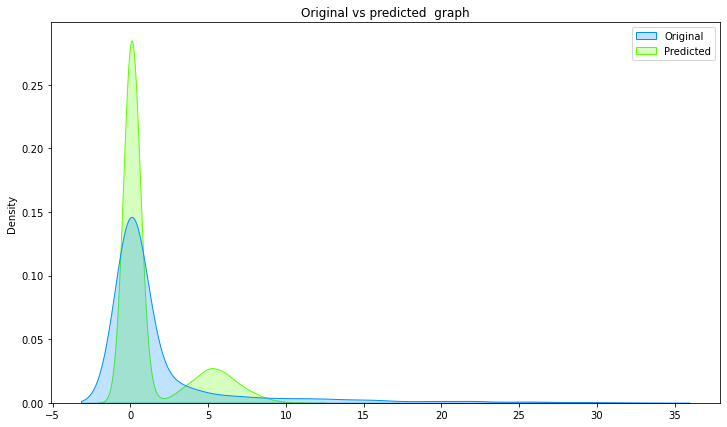

In [215]:
# Viewing the difference of prediction using Visualization 
plt.figure(figsize=(12,7))
sns.kdeplot(data=df_new1, palette='gist_rainbow_r',gridsize=900, shade=True)
plt.title('Original vs predicted  graph')

### Concluding Remarks for Regression Model

* We predicted the outcome of RainTomorrow in Australia by collecting the dataset of Rainfall Weather Forecasting having different records of temp, humidity, sunshine, pressure variations according to day and night of various locations. We classified the output of "Rainfall" using regression model.
* The r2_score of these models were then checked.
* Also cross-validation was performed to avoid overfitting of models.
* The prediction results indicated that Support Vector Regressor model achieved medium r2_score and has average results